#start

In [ ]:
%pip install --upgrade 'sqlalchemy<2.0'
%pip install pymysql pandas

import pandas as pd

In [ ]:
pd.set_option('display.max_colwidth', None)  # None means unlimited width. Replace with an integer for a specific width.

# Set the maximum number of rows and columns displayed when a frame is printed
pd.set_option('display.max_columns', None)  # None means unlimited columns. Replace with an integer for a specific number of columns.
pd.set_option('display.max_rows', 50)

#export to excel just cause need on other comp

In [ ]:
from sqlalchemy import create_engine

username = 'be903'
password = 'robots'
schema = 'StockholmHousingMarket'
host = 'mysql-1.cda.hhs.se'
port = '3306'
connection_string = "mysql+pymysql://{}:{}@{}/{}".format(username, password, host, schema)
connection = create_engine(connection_string)
apartment = pd.read_sql("select * from Apartment", con=connection)

In [ ]:
apartment = pd.read_sql("select * from Apartment", con=connection)
apartment.rename(columns={'housing_association_org_number': 'org_number'}, inplace=True)

In [ ]:
HA_df = pd.read_sql("select * from HousingAssociation", con=connection)

In [ ]:
AR_df= pd.read_sql("select * from AnnualReport", con=connection)

In [ ]:
df = apartment.merge(HA_df, on='org_number', how='outer').merge(AR_df, on='org_number', how='outer')

#nans

In [ ]:
number_of_nas_in_sell = df['sell_price'].isna().sum()
number_of_nas_in_sell

14954

In [ ]:
na_counts = df.isna().sum()

# Iterate through the Series and print the count of NAs for each column
for column_name, na_count in na_counts.items():
    print(f"'{column_name}': {na_count} ")

'id': 0 
'sell_date': 0 
'sell_price': 14954 
'rooms': 1365 
'legal_district': 4272 
'postcode': 0 
'locality': 45100 
'street_name': 467 
'object_type': 0 
'street_address': 0 
'brokers_description': 0 
'latitude': 0 
'longitude': 0 
'energy_class': 409776 
'has_solar_panels': 633108 
'living_area': 2034 
'additional_area': 627474 
'plot_area': 636390 
'rent': 7161 
'floor': 54581 
'operating_cost': 276937 
'agency_id': 554435 
'asking_price': 563567 
'has_balcony': 632847 
'has_fireplace': 632847 
'has_patio': 632847 
'is_new_construction': 632847 
'width': 632996 
'height': 632996 
'org_number': 4186 
'name': 4186 
'construction_year': 96184 
'fiscal_year': 4186 
'housing_coop_id': 4186 
'association_tax_liability': 7486 
'long_term_debt_other': 230161 
'long_term_real_estate_debt': 4186 
'number_of_rental_units': 7123 
'number_of_units': 4186 
'plot_is_leased': 4186 
'savings': 6468 
'total_commercial_area': 32462 
'total_living_area': 4186 
'total_loan': 4186 
'total_plot_area': 6

In [ ]:
df.describe()

,sell_price,rooms,postcode,latitude,longitude,has_solar_panels,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,has_balcony,has_fireplace,has_patio,is_new_construction,width,height,construction_year,fiscal_year,housing_coop_id,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area
count,6.218060e+05,635395.000000,636760.000000,636760.000000,636760.000000,3652.000000,634726.000000,9286.000000,370.000000,629599.000000,582179.000000,359823.000000,82325.000000,7.319300e+04,3913.000000,3913.000000,3913.000000,3913.0,3764.000000,3764.000000,540576.000000,632574.000000,632574.00000,4.065990e+05,6.325740e+05,629637.000000,632574.000000,632574.000000,630292.000000,604298.000000,632574.000000,6.325740e+05,576009.000000,593032.000000
mean,4.206617e+06,2.397328,12553.622395,59.320277,18.029708,0.009036,59.883736,15.746715,3043.508108,3205.631227,2.771761,502.561987,198.742035,4.421596e+06,0.525939,0.064145,0.087657,0.0,2030.815090,1691.713868,1956.047919,2019.597361,95090.17183,2.054261e+05,4.436619e+07,2.852812,137.873999,0.371688,179.429466,675.431964,8176.047477,4.449823e+07,1464.996924,192.043355
std,2.600170e+06,0.972015,1776.803730,0.031880,0.061158,0.094641,24.876433,27.715553,14133.518325,1301.792283,2.276815,350.634261,324.617512,2.862386e+06,0.499391,0.245043,0.282831,0.0,1220.782103,931.294541,35.201834,1.374776,78206.61341,7.596557e+06,5.374424e+07,6.774708,170.297549,0.483256,325.339114,1132.191650,9609.652651,5.408028e+07,7353.393305,481.509852
min,1.550000e+05,1.000000,11120.000000,59.231693,17.803317,0.000000,10.000000,1.000000,1.000000,0.000000,-3.000000,10.000000,9.000000,8.950000e+05,0.000000,0.000000,0.000000,0.0,400.000000,320.000000,1650.000000,1983.000000,43097.00000,-1.000000e+06,0.000000e+00,0.000000,0.000000,0.000000,-13716.000000,0.000000,0.000000,-1.000000e+00,0.000000,0.000000
25%,2.630000e+06,2.000000,11362.000000,59.298898,18.002506,0.000000,41.000000,6.000000,46.750000,2261.000000,1.000000,350.000000,20.000000,2.595000e+06,0.000000,0.000000,0.000000,0.0,1240.000000,1118.000000,1931.000000,2019.000000,49335.00000,0.000000e+00,8.255000e+06,0.000000,36.000000,0.000000,109.000000,35.000000,2075.000000,8.300000e+06,0.000000,0.000000
50%,3.440000e+06,2.000000,11853.000000,59.319763,18.039051,0.000000,56.000000,11.000000,71.000000,3060.000000,2.000000,450.000000,32.000000,3.500000e+06,1.000000,0.000000,0.000000,0.0,1754.000000,1335.000000,1947.000000,2020.000000,57020.00000,0.000000e+00,2.438100e+07,0.000000,72.000000,0.000000,191.000000,241.000000,4599.000000,2.441088e+07,0.000000,0.000000
75%,5.000000e+06,3.000000,12636.000000,59.341130,18.077031,0.000000,75.000000,18.000000,443.750000,3986.000000,4.000000,586.000000,255.000000,5.395000e+06,1.000000,0.000000,0.000000,0.0,2480.250000,2100.000000,1985.000000,2021.000000,81790.00000,0.000000e+00,6.107766e+07,2.000000,166.000000,1.000000,269.000000,802.000000,10091.000000,6.116500e+07,0.000000,111.000000
max,7.750000e+07,20.000000,17560.000000,59.417843,18.141756,1.000000,391.000000,1133.000000,86936.000000,54325.000000,91.000000,34581.000000,1136.000000,6.000000e+07,1.000000,1.000000,1.000000,0.0,10424.000000,6720.000000,2023.000000,2024.000000,286172.00000,4.545548e+08,3.400000e+08,88.000000,1031.000000,1.000000,29764.000000,8851.000000,60679.000000,4.545548e+08,87196.000000,6777.000000


#fixing time

In [ ]:
df['sell_date'] = pd.to_datetime(df['sell_date'])

reference_date = df['sell_date'].min()
df['days_since_reference'] = (df['sell_date'] - reference_date).dt.days

# Convert to date ordinal (number of days)
#df['sell_date_ordinal'] = df['sell_date'].apply(lambda x: x.toordinal())

# Convert to Unix timestamp (number of seconds)
#df['sell_date_timestamp'] = df['sell_date'].apply(lambda x: x.timestamp())

# If you need the Unix timestamp as an integer
#df['sell_date_timestamp_int'] = df['sell_date'].astype('int64') // 10**9
df

,id,sell_date,sell_price,rooms,legal_district,postcode,locality,street_name,object_type,street_address,brokers_description,latitude,longitude,energy_class,has_solar_panels,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,has_balcony,has_fireplace,has_patio,is_new_construction,width,height,org_number,name,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
0,0000e3917662f30720d1801912f45349,2018-11-12,3600000.0,1.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,41.0,NaN,NaN,906.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2019.0,81598.0,lowered_tax_liability,0.0,1.0,0.0,28.0,0.0,-17.0,NaN,2028.0,1.0,NaN,NaN,2140
1,0000e3917662f30720d1801912f45349,2018-11-12,3600000.0,1.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,41.0,NaN,NaN,906.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2020.0,81598.0,lowered_tax_liability,NaN,1.0,0.0,28.0,0.0,216.0,321.0,2028.0,1.0,NaN,NaN,2140
2,0000e3917662f30720d1801912f45349,2018-11-12,3600000.0,1.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,41.0,NaN,NaN,906.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2021.0,81598.0,lowered_tax_liability,0.0,1.0,0.0,28.0,0.0,160.0,321.0,2028.0,1.0,NaN,NaN,2140
3,15629452382f161cf1ac95097b98c1dc,2022-09-14,6495000.0,2.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,59.0,NaN,NaN,1213.0,2.0,1667.0,289.0,6495000.0,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2019.0,81598.0,lowered_tax_liability,0.0,1.0,0.0,28.0,0.0,-17.0,NaN,2028.0,1.0,NaN,NaN,3542
4,15629452382f161cf1ac95097b98c1dc,2022-09-14,6495000.0,2.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,59.0,NaN,NaN,1213.0,2.0,1667.0,289.0,6495000.0,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2020.0,81598.0,lowered_tax_liability,NaN,1.0,0.0,28.0,0.0,216.0,321.0,2028.0,1.0,NaN,NaN,3542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636755,faef74a372aeef9a6faca7df96d09d44,2023-10-11,NaN,2.0,Östermalm,11454,Innanför tullarna,Styrmansgatan,Apartment,Styrmansgatan 43A,Östermalm,59.335424,18.086856,None,NaN,60.0,NaN,NaN,2090.0,2.0,1600.0,12.0,7595000.0,NaN,NaN,NaN,NaN,NaN,NaN,769603-8665,BRF Neptunus 13,1889.0,2020.0,56518.0,lowered_tax_liability,NaN,4900000.0,0.0,17.0,0.0,127.0,0.0,1233.0,4900000.0,0.0,0.0,3934
636756,fb149ad2a25f5f0acde122eb24b1465b,2018-09-20,3150000.0,2.0,Bromma,16755,None,Mossvägen,Apartment,Mossvägen 1,Bromma,59.329238,17.966369,None,NaN,52.0,NaN,NaN,3264.0,1.0,457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769618-9088,BRF Mossvägen,1929.0,2018.0,276260.0,lowered_tax_liability,0.0,5742887.0,1.0,11.0,1.0,25.0,57.0,660.0,5742887.0,1646.0,0.0,2087
636757,fbef28f91344617894b9c7958464e032,2021-01-29,25000000.0,4.0,Östermalm,11439,Innanför tullarna,Nybrogatan,Apartment,Nybrogatan 28,Östermalm,59.336441,18.079027,None,NaN,114.0,NaN,NaN,6583.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769620-3483,BRF Krejaren 4,NaN,2019.0,268187.0,lowered_tax_liability,NaN,1000000.0,0.0,10.0,1.0,132.0,NaN,1211.0,1000000.0,NaN,NaN,2949
636758,fd2c5f6532997dd25487833df12ff7a5,2019-10-20,9550000.0,3.0,Östermalm,11445,Innanför tullarna,Nybergsgatan,Apartment,Nybergsgatan 7,Östermalm,59.337144,18.084244,None,NaN,105.0,NaN,NaN,5938.0,0.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769601-0524,BRF Kronkvarnen 40,1996.0,2018.0,242264.0,lowere

#unique vals


In [ ]:
cols = ['has_solar_panels', 'has_balcony','has_fireplace','has_patio']
for col in cols:
  print(len(df[col]))
  print(df[col].isna().sum())
  print(len(df[col])-df[col].isna().sum())
  print(df[col].value_counts())

636760
633108
3652
has_solar_panels
0.0    3619
1.0      33
Name: count, dtype: int64
636760
632847
3913
has_balcony
1.0    2058
0.0    1855
Name: count, dtype: int64
636760
632847
3913
has_fireplace
0.0    3662
1.0     251
Name: count, dtype: int64
636760
632847
3913
has_patio
0.0    3570
1.0     343
Name: count, dtype: int64


In [ ]:
len(df['brokers_description'].unique())

1189

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values and their counts in column '{column}':")
        print(len(df[column].unique()))
        print("\n")

Unique values and their counts in column 'id':
178962


Unique values and their counts in column 'legal_district':
22


Unique values and their counts in column 'locality':
38


Unique values and their counts in column 'street_name':
1844


Unique values and their counts in column 'object_type':
3


Unique values and their counts in column 'street_address':
20739


Unique values and their counts in column 'brokers_description':
1189


Unique values and their counts in column 'energy_class':
15


Unique values and their counts in column 'org_number':
5255


Unique values and their counts in column 'name':
5251


Unique values and their counts in column 'association_tax_liability':
5




In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values and their counts in column '{column}':")
        print(df[column].value_counts())
        print("\n")

Unique values and their counts in column 'id':
id
fb6ee79c9e280f408e40754c848cff90    6
c2f43246434868862b3df45eddd04e65    6
ba31ceab89fd8468dad4ef4b3f48066c    6
b7b92a48d4d2a282a068b6ceb2747714    6
b7af9ab18b3f852d0931c80282d74dd1    6
                                   ..
a0e30239fa9a7ecfe9d2492453983b3f    1
a0cf2fa889bf937e75383e8f769ebd44    1
a0bf6f420a1608f44f0cfe7fcbe60360    1
a0b4e1db2ee481131ed83f5899642faa    1
e285d7549f0d67323cb8ba7adf11598b    1
Name: count, Length: 178962, dtype: int64


Unique values and their counts in column 'legal_district':
legal_district
Södermalm                88128
Hägersten-Liljeholmen    77383
Kungsholmen              76595
Vasastan                 72190
Enskede-Årsta-Vantör     60464
Bromma                   52659
Skarpnäck                40495
Östermalm                25541
Farsta                   24200
Gärdet                   21977
Hässelby-Vällingby       18048
Rinkeby-Kista            15578
Hammarby Sjöstad         15082
Essingeöarn

In [ ]:
#flo_columns = ['id', 'x2','x3','x4','x5','x6','x8','x9','x10','x11','x13']
#for column in flo_columns:
 #   Original_df[column] = Original_df[column].astype(float)
#Original_df.dtypes
# Original_df[''] = Original_df[''].astype(int)

In [ ]:
df

,id,sell_date,sell_price,rooms,legal_district,postcode,locality,street_name,object_type,street_address,brokers_description,latitude,longitude,energy_class,has_solar_panels,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,has_balcony,has_fireplace,has_patio,is_new_construction,width,height,org_number,name,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
0,0000e3917662f30720d1801912f45349,2018-11-12,3600000.0,1.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,41.0,NaN,NaN,906.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2019.0,81598.0,lowered_tax_liability,0.0,1.0,0.0,28.0,0.0,-17.0,NaN,2028.0,1.0,NaN,NaN,2140
1,0000e3917662f30720d1801912f45349,2018-11-12,3600000.0,1.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,41.0,NaN,NaN,906.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2020.0,81598.0,lowered_tax_liability,NaN,1.0,0.0,28.0,0.0,216.0,321.0,2028.0,1.0,NaN,NaN,2140
2,0000e3917662f30720d1801912f45349,2018-11-12,3600000.0,1.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,41.0,NaN,NaN,906.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2021.0,81598.0,lowered_tax_liability,0.0,1.0,0.0,28.0,0.0,160.0,321.0,2028.0,1.0,NaN,NaN,2140
3,15629452382f161cf1ac95097b98c1dc,2022-09-14,6495000.0,2.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,59.0,NaN,NaN,1213.0,2.0,1667.0,289.0,6495000.0,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2019.0,81598.0,lowered_tax_liability,0.0,1.0,0.0,28.0,0.0,-17.0,NaN,2028.0,1.0,NaN,NaN,3542
4,15629452382f161cf1ac95097b98c1dc,2022-09-14,6495000.0,2.0,Vasastan,11349,Innanför tullarna,Frejgatan,Apartment,Frejgatan 10,Vasastan,59.348123,18.059586,None,NaN,59.0,NaN,NaN,1213.0,2.0,1667.0,289.0,6495000.0,NaN,NaN,NaN,NaN,NaN,NaN,716418-1401,BRF Ingemar 3,1886.0,2020.0,81598.0,lowered_tax_liability,NaN,1.0,0.0,28.0,0.0,216.0,321.0,2028.0,1.0,NaN,NaN,3542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636755,faef74a372aeef9a6faca7df96d09d44,2023-10-11,NaN,2.0,Östermalm,11454,Innanför tullarna,Styrmansgatan,Apartment,Styrmansgatan 43A,Östermalm,59.335424,18.086856,None,NaN,60.0,NaN,NaN,2090.0,2.0,1600.0,12.0,7595000.0,NaN,NaN,NaN,NaN,NaN,NaN,769603-8665,BRF Neptunus 13,1889.0,2020.0,56518.0,lowered_tax_liability,NaN,4900000.0,0.0,17.0,0.0,127.0,0.0,1233.0,4900000.0,0.0,0.0,3934
636756,fb149ad2a25f5f0acde122eb24b1465b,2018-09-20,3150000.0,2.0,Bromma,16755,None,Mossvägen,Apartment,Mossvägen 1,Bromma,59.329238,17.966369,None,NaN,52.0,NaN,NaN,3264.0,1.0,457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769618-9088,BRF Mossvägen,1929.0,2018.0,276260.0,lowered_tax_liability,0.0,5742887.0,1.0,11.0,1.0,25.0,57.0,660.0,5742887.0,1646.0,0.0,2087
636757,fbef28f91344617894b9c7958464e032,2021-01-29,25000000.0,4.0,Östermalm,11439,Innanför tullarna,Nybrogatan,Apartment,Nybrogatan 28,Östermalm,59.336441,18.079027,None,NaN,114.0,NaN,NaN,6583.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769620-3483,BRF Krejaren 4,NaN,2019.0,268187.0,lowered_tax_liability,NaN,1000000.0,0.0,10.0,1.0,132.0,NaN,1211.0,1000000.0,NaN,NaN,2949
636758,fd2c5f6532997dd25487833df12ff7a5,2019-10-20,9550000.0,3.0,Östermalm,11445,Innanför tullarna,Nybergsgatan,Apartment,Nybergsgatan 7,Östermalm,59.337144,18.084244,None,NaN,105.0,NaN,NaN,5938.0,0.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769601-0524,BRF Kronkvarnen 40,1996.0,2018.0,242264.0,lowere

In [ ]:
cols = ['additional_area','plot_area','total_commercial_area', 'has_balcony','total_living_area', 'total_plot_area', 'total_rental_area','operating_cost',	'agency_id',	'asking_price',	'is_new_construction',	'width',	'height', 'long_term_debt_other']
for column in cols:
        print(f"Unique values and their counts in column '{column}':")
        print(df[column].value_counts())
        print("NA count: " + str(df[column].isna().sum()))
        print("\n")

Unique values and their counts in column 'additional_area':
additional_area
5.0      582
10.0     564
8.0      550
7.0      548
4.0      481
        ... 
52.0       2
62.0       2
141.0      2
73.0       1
71.0       1
Name: count, Length: 96, dtype: int64
NA count: 627474


Unique values and their counts in column 'plot_area':
plot_area
74.0      19
54.0      17
75.0      15
71.0      15
1241.0    12
          ..
927.0      1
754.0      1
334.0      1
809.0      1
243.0      1
Name: count, Length: 75, dtype: int64
NA count: 636390


Unique values and their counts in column 'total_commercial_area':
total_commercial_area
0.0       135097
60.0        3456
50.0        3127
80.0        2748
4644.0      2478
           ...  
661.0          4
761.0          3
738.0          2
2262.0         1
2543.0         1
Name: count, Length: 1297, dtype: int64
NA count: 32462


Unique values and their counts in column 'has_balcony':
has_balcony
1.0    2058
0.0    1855
Name: count, dtype: int64
NA count:

#checking area metric



In [ ]:
def filter_columns_by_name(df, substring):
    filtered_columns = [col for col in df.columns if substring in col]


    return df[filtered_columns]
filtered_df = filter_columns_by_name(df, 'area')
filtered_df

,living_area,additional_area,plot_area,total_commercial_area,total_living_area,total_plot_area,total_rental_area
0,41.0,NaN,NaN,NaN,2028.0,NaN,NaN
1,41.0,NaN,NaN,321.0,2028.0,NaN,NaN
2,41.0,NaN,NaN,321.0,2028.0,NaN,NaN
3,59.0,NaN,NaN,NaN,2028.0,NaN,NaN
4,59.0,NaN,NaN,321.0,2028.0,NaN,NaN
...,...,...,...,...,...,...,...
636755,60.0,NaN,NaN,0.0,1233.0,0.0,0.0
636756,52.0,NaN,NaN,57.0,660.0,1646.0,0.0
636757,114.0,NaN,NaN,NaN,1211.0,NaN,NaN
636758,105.0,NaN,NaN,0.0,876.0,0.0,0.0


In [ ]:
cols = ['living_area','additional_area','plot_area','total_commercial_area','total_living_area', 'total_plot_area', 'total_rental_area']
for column in cols:
        print(f"Unique values and their counts in column '{column}':")
        print(df[column].value_counts())
        print("NA count: " + str(df[column].isna().sum()))
        print("\n")

Unique values and their counts in column 'living_area':
living_area
54.0     13705
42.0     13623
40.0     13368
45.0     13324
41.0     12597
         ...  
277.0        1
326.0        1
391.0        1
317.0        1
291.0        1
Name: count, Length: 284, dtype: int64
NA count: 2034


Unique values and their counts in column 'additional_area':
additional_area
5.0      582
10.0     564
8.0      550
7.0      548
4.0      481
        ... 
52.0       2
62.0       2
141.0      2
73.0       1
71.0       1
Name: count, Length: 96, dtype: int64
NA count: 627474


Unique values and their counts in column 'plot_area':
plot_area
74.0      19
54.0      17
75.0      15
71.0      15
1241.0    12
          ..
927.0      1
754.0      1
334.0      1
809.0      1
243.0      1
Name: count, Length: 75, dtype: int64
NA count: 636390


Unique values and their counts in column 'total_commercial_area':
total_commercial_area
0.0       135097
60.0        3456
50.0        3127
80.0        2748
4644.0      247

# Forward fill and mean value imputation




In [ ]:
import numpy as np
na_counts = df.isna().sum()
print(np.sum(na_counts.values))
for column_name, na_count in na_counts.items():
    print(f"'{column_name}': {na_count} ")

8151038
'id': 0 
'sell_date': 0 
'sell_price': 14954 
'rooms': 1365 
'legal_district': 4272 
'postcode': 0 
'locality': 45100 
'street_name': 467 
'object_type': 0 
'street_address': 0 
'brokers_description': 0 
'latitude': 0 
'longitude': 0 
'energy_class': 409776 
'has_solar_panels': 633108 
'living_area': 2034 
'additional_area': 627474 
'plot_area': 636390 
'rent': 7161 
'floor': 54581 
'operating_cost': 276937 
'agency_id': 554435 
'asking_price': 563567 
'has_balcony': 632847 
'has_fireplace': 632847 
'has_patio': 632847 
'is_new_construction': 632847 
'width': 632996 
'height': 632996 
'org_number': 4186 
'name': 4186 
'construction_year': 96184 
'fiscal_year': 4186 
'housing_coop_id': 4186 
'association_tax_liability': 7486 
'long_term_debt_other': 230161 
'long_term_real_estate_debt': 4186 
'number_of_rental_units': 7123 
'number_of_units': 4186 
'plot_is_leased': 4186 
'savings': 6468 
'total_commercial_area': 32462 
'total_living_area': 4186 
'total_loan': 4186 
'total_plot_

In [ ]:
# Forward filling features which should remain "constant" over time within an organization
column_to_fill_organizations = ['long_term_debt_other', 'long_term_real_estate_debt', 'number_of_rental_units', 'number_of_units', 'number_of_rental_units', 'plot_is_leased', 'total_commercial_area', 'total_living_area', 'total_plot_area', 'total_rental_area']

# Forward fill within each group defined by 'org_number'
for column in column_to_fill_organizations:
    df[column] = df.groupby('org_number')[column].transform(lambda x: x.ffill())

# Forward filling features which should remain "constant" over time in an apartment, such as size of the apartment and bedrooms
column_to_fill_apartments = ['living_area', 'additional_area', 'plot_area', 'floor', 'rent']

# Forward fill within each group defined by 'id'
for column in column_to_fill_apartments:
    df[column] = df.groupby('id')[column].transform(lambda x: x.ffill())

In [ ]:
na_counts = df.isna().sum()
print(np.sum(na_counts.values))
for column_name, na_count in na_counts.items():
    print(f"'{column_name}': {na_count} ")

7856974
'id': 0 
'sell_date': 0 
'sell_price': 14954 
'rooms': 1365 
'legal_district': 4272 
'postcode': 0 
'locality': 45100 
'street_name': 467 
'object_type': 0 
'street_address': 0 
'brokers_description': 0 
'latitude': 0 
'longitude': 0 
'energy_class': 409776 
'has_solar_panels': 633108 
'living_area': 2034 
'additional_area': 627474 
'plot_area': 636390 
'rent': 7161 
'floor': 54581 
'operating_cost': 276937 
'agency_id': 554435 
'asking_price': 563567 
'has_balcony': 632847 
'has_fireplace': 632847 
'has_patio': 632847 
'is_new_construction': 632847 
'width': 632996 
'height': 632996 
'org_number': 4186 
'name': 4186 
'construction_year': 96184 
'fiscal_year': 4186 
'housing_coop_id': 4186 
'association_tax_liability': 7486 
'long_term_debt_other': 9191 
'long_term_real_estate_debt': 4186 
'number_of_rental_units': 4585 
'number_of_units': 4186 
'plot_is_leased': 4186 
'savings': 6468 
'total_commercial_area': 14051 
'total_living_area': 4186 
'total_loan': 4186 
'total_plot_ar

In [ ]:
df['additional_area'] = df['additional_area'].fillna(0)

categorical_columns = ['energy_class', 'association_tax_liability', 'object_type', 'sell_price']  # Known categorical columns

# Select only numeric columns and exclude known categorical ones
numeric_columns = df.select_dtypes(include=[np.number]).columns.difference(categorical_columns)

# Calculate the mean of each numeric column that is not categorical
means = df[numeric_columns].mean()

# Fill missing values with the mean of their respective columns
df[numeric_columns] = df[numeric_columns].fillna(means)


In [ ]:
na_counts = df.isna().sum()
print(np.sum(na_counts.values))
for column_name, na_count in na_counts.items():
    print(f"'{column_name}': {na_count} ")

490427
'id': 0 
'sell_date': 0 
'sell_price': 14954 
'rooms': 0 
'legal_district': 4272 
'postcode': 0 
'locality': 45100 
'street_name': 467 
'object_type': 0 
'street_address': 0 
'brokers_description': 0 
'latitude': 0 
'longitude': 0 
'energy_class': 409776 
'has_solar_panels': 0 
'living_area': 0 
'additional_area': 0 
'plot_area': 0 
'rent': 0 
'floor': 0 
'operating_cost': 0 
'agency_id': 0 
'asking_price': 0 
'has_balcony': 0 
'has_fireplace': 0 
'has_patio': 0 
'is_new_construction': 0 
'width': 0 
'height': 0 
'org_number': 4186 
'name': 4186 
'construction_year': 0 
'fiscal_year': 0 
'housing_coop_id': 0 
'association_tax_liability': 7486 
'long_term_debt_other': 0 
'long_term_real_estate_debt': 0 
'number_of_rental_units': 0 
'number_of_units': 0 
'plot_is_leased': 0 
'savings': 0 
'total_commercial_area': 0 
'total_living_area': 0 
'total_loan': 0 
'total_plot_area': 0 
'total_rental_area': 0 
'days_since_reference': 0 


In [ ]:
df["legal_district"].value_counts()

legal_district
Södermalm                88128
Hägersten-Liljeholmen    77383
Kungsholmen              76595
Vasastan                 72190
Enskede-Årsta-Vantör     60464
Bromma                   52659
Skarpnäck                40495
Östermalm                25541
Farsta                   24200
Gärdet                   21977
Hässelby-Vällingby       18048
Rinkeby-Kista            15578
Hammarby Sjöstad         15082
Essingeöarna             10148
Älvsjö                    8093
Spånga-Tensta             7279
Norrmalm                  7181
Skärholmen                5833
Norra Djurgården          5128
Gamla Stan                 474
Djurgården                  12
Name: count, dtype: int64

##checking is legal dist and postcode have same info

In [ ]:
df[['legal_district','postcode']].head(200)

,legal_district,postcode
0,Vasastan,11349
1,Vasastan,11349
2,Vasastan,11349
3,Vasastan,11349
4,Vasastan,11349
...,...,...
195,Hässelby-Vällingby,16561
196,Hässelby-Vällingby,16561
197,Hässelby-Vällingby,16561
198,Hässelby-Vällingby,16562


In [ ]:
df.groupby('legal_district')['postcode'].unique()

legal_district
Bromma                                                                                         [16835, 16739, 16875, 16866, 16845, 16841, 16873, 16874, 16862, 16848, 16733, 16745, 16743, 16755, 16776, 16859, 16831, 16867, 16771, 16832, 16834, 16735, 16858, 16752, 16846, 16843, 16876, 16736, 16865, 16765, 16732, 16774, 16741, 16844, 16763, 16762, 16766, 16839, 16753, 16737, 16751, 16744, 16870, 16836, 16754, 16775, 16853, 16868, 16850, 16761, 16849, 16833, 16860, 16847, 16738, 16838, 16757, 16731, 16756, 16869, 16861, 16840, 16855, 16830, 17275, 16864, 16857, 16837, 16767, 16773, 16877, 16758, 16764, 16851]
Djurgården                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
df.groupby('legal_district')['locality'].unique()

legal_district
Bromma                   [Abrahamsberg, Traneberg, None, Riksby, Kista/Hässelby/Vällingby/Spånga, Nockeby, Ulvsunda industriområde, Alvik, Spånga]
Djurgården                                                                                               [Östermalm/Djurgården, Innanför tullarna]
Enskede-Årsta-Vantör                         [Årsta, Älvsjö/Farsta/Vantör, Enskede, Enskededalen, Enskede gård, Östberga, Enskede/Årsta/Skarpnäck]
Essingeöarna                                                                                                            [Kungsholmen/Essingeöarna]
Farsta                                                                                                             [Älvsjö/Farsta/Vantör, Enskede]
Gamla Stan                                                                                                                     [Innanför tullarna]
Gärdet                                                                                                 

In [ ]:
df.groupby('locality')['postcode'].unique()

locality
Abrahamsberg                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [16835, 16831, 16832, 16834, 16833, 16830, 16836, 16764]
Alvik                                                                                                                                                                                                                                                     

#dropping cols

In [ ]:
dropped_df = df.drop(['id', 'sell_date', 'org_number', 'name', 'street_address', 'street_name','brokers_description', 'legal_district', 'locality','energy_class', 'is_new_construction', 'has_balcony', 'has_fireplace','has_solar_panels', 'has_patio', 'width', 'height'], axis=1)
dropped_df.sort_values(by="rooms")

,sell_price,rooms,postcode,object_type,latitude,longitude,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
0,3600000.0,1.0,11349,Apartment,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2019.0,81598.0,lowered_tax_liability,0.000000,1.0,0.0,28.0,0.0,-17.0,662.936964,2028.0,1.0,1422.987395,187.503821,2140
201471,NaN,1.0,12867,Apartment,59.257454,18.111198,40.0,0.0,3043.508108,2439.0,1.000000,502.561987,47.000000,1.750000e+06,1954.000000,2020.0,79014.0,lowered_tax_liability,0.000000,2425000.0,4.0,75.0,0.0,138.0,85.000000,4367.0,2425000.0,0.000000,154.000000,3874
201472,NaN,1.0,12867,Apartment,59.257454,18.111198,40.0,0.0,3043.508108,2439.0,1.000000,502.561987,47.000000,1.750000e+06,1954.000000,2021.0,79014.0,lowered_tax_liability,0.000000,1.0,3.0,75.0,0.0,165.0,115.000000,4404.0,1.0,0.000000,117.000000,3874
201485,1925000.0,1.0,12867,Apartment,59.257164,18.111614,38.0,0.0,3043.508108,1921.0,1.000000,502.561987,198.742035,4.421596e+06,1954.000000,2018.0,79014.0,lowered_tax_liability,0.000000,4525000.0,4.0,75.0,0.0,177.0,85.000000,4367.0,4525000.0,0.000000,154.000000,1790
201486,1925000.0,1.0,12867,Apartment,59.257164,18.111614,38.0,0.0,3043.508108,1921.0,1.000000,502.561987,198.742035,4.421596e+06,1954.000000,2019.0,79014.0,lowered_tax_liability,0.000000,2525000.0,4.0,75.0,0.0,76.0,85.000000,4367.0,2525000.0,0.000000,154.000000,1790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610710,27200000.0,10.0,11820,Apartment,59.319944,18.069961,303.0,0.0,3043.508108,10682.0,2.771761,502.561987,198.742035,4.421596e+06,1956.047919,2019.0,77266.0,lowered_tax_liability,308882.000000,21250000.0,0.0,14.0,1.0,531.0,458.000000,1580.0,21558882.0,0.000000,0.000000,2873
538052,46000000.0,10.0,11460,Apartment,59.337242,18.088772,335.0,0.0,3043.508108,21644.0,5.000000,502.561987,198.742035,4.421596e+06,1894.000000,2019.0,80503.0,lowered_tax_liability,143610.258113,10886249.0,0.0,36.0,0.0,408.0,63.000000,5453.0,10886249.0,1422.987395,187.503821,3186
185803,7255000.0,20.0,11767,Apartment,59.317444,18.008013,129.0,0.0,3043.508108,7205.0,7.000000,502.561987,198.742035,4.421596e+06,1983.000000,2018.0,61510.0,lowered_tax_liability,0.000000,131167000.0,0.0,130.0,0.0,443.0,3883.000000,12589.0,131167000.0,0.000000,0.000000,449
185805,7255000.0,20.0,11767,Apartment,59.317444,18.008013,129.0,0.0,3043.508108,7205.0,7.000000,502.561987,198.742035,4.421596e+06,1983.000000,2020.0,61510.0,lowered_tax_liability,0.000000,130000000.0,0.0,130.0,0.0,341.0,3302.000000,12589.0,130000000.0,0.000000,0.000000,449


#Mapping categorical


In [ ]:
dropped_df.dtypes

sell_price                    float64
rooms                         float64
postcode                        int64
object_type                    object
latitude                      float64
longitude                     float64
living_area                   float64
additional_area               float64
plot_area                     float64
rent                          float64
floor                         float64
operating_cost                float64
agency_id                     float64
asking_price                  float64
construction_year             float64
fiscal_year                   float64
housing_coop_id               float64
association_tax_liability      object
long_term_debt_other          float64
long_term_real_estate_debt    float64
number_of_rental_units        float64
number_of_units               float64
plot_is_leased                float64
savings                       float64
total_commercial_area         float64
total_living_area             float64
total_loan  

In [ ]:
import numpy as np




unique_tax_liability = dropped_df['association_tax_liability'].unique()

print(unique_tax_liability)

unique_object_type = dropped_df['object_type'].unique()

print(unique_object_type)



['lowered_tax_liability' None 'standard_tax_liability' nan 'other']
['Apartment' 'Rowhouse' 'Twin House']


##not actually nan make nan


In [ ]:
viewDF = dropped_df[['association_tax_liability', 'object_type']]
viewDF.head(200)

,association_tax_liability,object_type
0,lowered_tax_liability,Apartment
1,lowered_tax_liability,Apartment
2,lowered_tax_liability,Apartment
3,lowered_tax_liability,Apartment
4,lowered_tax_liability,Apartment
...,...,...
195,lowered_tax_liability,Apartment
196,lowered_tax_liability,Apartment
197,lowered_tax_liability,Apartment
198,lowered_tax_liability,Apartment


In [ ]:
viewDF.isna().sum()

association_tax_liability    7486
object_type                     0
dtype: int64

In [ ]:
viewDF[viewDF.isna().any(axis=1)]



,association_tax_liability,object_type
10901,None,Apartment
10906,None,Apartment
10911,None,Apartment
10916,None,Apartment
10921,None,Apartment
...,...,...
635734,None,Apartment
635739,None,Apartment
635744,None,Apartment
635749,None,Apartment


In [ ]:
dropped_df.replace(to_replace=[None], value=np.nan, inplace=True)
dropped_df[dropped_df.isna().any(axis=1)]

,sell_price,rooms,postcode,object_type,latitude,longitude,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
39,NaN,5.0,11356,Apartment,59.348301,18.059769,113.0,8.0,3043.508108,2134.0,5.000000,2760.0,302.0,15250000.0,1886.000000,2019.0,81598.0,lowered_tax_liability,0.000000e+00,1.0,0.0,28.0,0.0,-17.0,321.000000,2028.0,1.0,1422.987395,187.503821,3921
40,NaN,5.0,11356,Apartment,59.348301,18.059769,113.0,8.0,3043.508108,2134.0,5.000000,2760.0,302.0,15250000.0,1886.000000,2020.0,81598.0,lowered_tax_liability,0.000000e+00,1.0,0.0,28.0,0.0,216.0,321.000000,2028.0,1.0,1422.987395,187.503821,3921
41,NaN,5.0,11356,Apartment,59.348301,18.059769,113.0,8.0,3043.508108,2134.0,5.000000,2760.0,302.0,15250000.0,1886.000000,2021.0,81598.0,lowered_tax_liability,0.000000e+00,1.0,0.0,28.0,0.0,160.0,321.000000,2028.0,1.0,1422.987395,187.503821,3921
74,NaN,4.0,16561,Apartment,59.360473,17.834156,101.0,0.0,3043.508108,6142.0,11.000000,600.0,947.0,2695000.0,1956.047919,2018.0,80279.0,lowered_tax_liability,0.000000e+00,132385000.0,20.0,151.0,1.0,82.0,155.000000,11897.0,132385000.0,0.000000,1645.000000,3905
75,NaN,4.0,16561,Apartment,59.360473,17.834156,101.0,0.0,3043.508108,6142.0,11.000000,600.0,947.0,2695000.0,1956.047919,2019.0,80279.0,lowered_tax_liability,1.664163e+07,132385000.0,18.0,151.0,1.0,64.0,155.000000,12054.0,149026633.0,0.000000,1488.000000,3905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636717,NaN,6.0,16561,Apartment,59.357359,17.836851,149.0,141.0,3043.508108,5911.0,2.771761,3358.0,65.0,7495000.0,1958.000000,2021.0,282017.0,lowered_tax_liability,0.000000e+00,2502835.0,0.0,30.0,1.0,198.0,662.936964,3643.0,2502835.0,16941.000000,187.503821,3900
636736,NaN,1.0,16761,Apartment,59.324006,17.957327,40.0,0.0,3043.508108,1876.0,1.000000,450.0,34.0,2995000.0,1956.047919,2019.0,269329.0,lowered_tax_liability,1.436103e+05,3100000.0,0.0,14.0,1.0,190.0,88.000000,993.0,3100000.0,1422.987395,187.503821,3943
636753,NaN,2.0,11454,Apartment,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.0,12.0,7595000.0,1889.000000,2018.0,56518.0,lowered_tax_liability,0.000000e+00,4700000.0,0.0,17.0,0.0,51.0,0.000000,1233.0,4700000.0,0.000000,0.000000,3934
636754,NaN,2.0,11454,Apartment,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.0,12.0,7595000.0,1889.000000,2019.0,56518.0,lowered_tax_liability,0.000000e+00,4900000.0,0.0,17.0,0.0,94.0,0.000000,1233.0,4900000.0,0.000000,0.000000,3934


In [ ]:
from sklearn.preprocessing import LabelEncoder
dropped_df['object_type'] = LabelEncoder().fit_transform(dropped_df['object_type'])
dropped_df['object_type'].unique()

array([0, 1, 2])

In [ ]:
    # Initialize the Random Forest Classifier
#    rfc = RandomForestClassifier(n_estimators=100, random_state=0)

    # Train the classifier
  #  rfc.fit(X_train, y_train)

    # Predict the missing values
  #  predicted_values = rfc.predict(X_missing)

    # Impute the missing values in the original dataframe
  #  df.loc[df[col_to_impute] == df[col_to_impute].max(), col_to_impute] = predicted_values
    # Recode the placeholder if necessary
   # df[col_to_impute] = df[col_to_impute].replace(df[col_to_impute].max(), np.nan)

# Imputation

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


cols_to_impute = ['association_tax_liability']


df_encoded = dropped_df.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object' and column in cols_to_impute:


      df_no_nans = df_encoded.dropna()
      na_counts = df_no_nans.isna().sum()
      for column_name, na_count in na_counts.items():
          print(f"'{column_name}': {na_count} ")

      print('█' * 500)
      print()

      df_with_nans = df_encoded[df_encoded.isna().any(axis=1)]
      na_counts = df_with_nans.isna().sum()
      for column_name, na_count in na_counts.items():
          print(f"'{column_name}': {na_count} ")

      for column in df_no_nans.columns:
        if df_no_nans[column].dtype == 'object' and column in cols_to_impute:
            df_no_nans[column] = LabelEncoder().fit_transform(df_no_nans[column].astype(str))
            features = df_no_nans.columns.difference([column])

            X_train = df_no_nans[features].drop(columns=['sell_price'])
            print(X_train.head(10))

            print('█' * 500)
            print()


            y_train = df_no_nans[column]
            print(y_train.head(10))

            X_pred = df_with_nans[features].drop(columns=['sell_price'])
            print(X_pred.head(10))



            rfc = RandomForestClassifier(n_estimators=100, random_state=8, verbose =3)

            # Train the classifier
            rfc.fit(X_train, y_train)


            predicted_values = rfc.predict(X_pred)

predicted_values


'sell_price': 0 
'rooms': 0 
'postcode': 0 
'object_type': 0 
'latitude': 0 
'longitude': 0 
'living_area': 0 
'additional_area': 0 
'plot_area': 0 
'rent': 0 
'floor': 0 
'operating_cost': 0 
'agency_id': 0 
'asking_price': 0 
'construction_year': 0 
'fiscal_year': 0 
'housing_coop_id': 0 
'association_tax_liability': 0 
'long_term_debt_other': 0 
'long_term_real_estate_debt': 0 
'number_of_rental_units': 0 
'number_of_units': 0 
'plot_is_leased': 0 
'savings': 0 
'total_commercial_area': 0 
'total_living_area': 0 
'total_loan': 0 
'total_plot_area': 0 
'total_rental_area': 0 
'days_since_reference': 0 
████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

<ipython-input-44-90ceff908bdf>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nans[column] = LabelEncoder().fit_transform(df_no_nans[column].astype(str))


   additional_area   agency_id  asking_price  construction_year  \
0              0.0  198.742035  4.421596e+06             1886.0   
1              0.0  198.742035  4.421596e+06             1886.0   
2              0.0  198.742035  4.421596e+06             1886.0   
3              0.0  289.000000  6.495000e+06             1886.0   
4              0.0  289.000000  6.495000e+06             1886.0   
5              0.0  289.000000  6.495000e+06             1886.0   
6              0.0  198.742035  4.421596e+06             1886.0   
7              0.0  198.742035  4.421596e+06             1886.0   
8              0.0  198.742035  4.421596e+06             1886.0   
9              0.0  198.742035  4.421596e+06             1886.0   

   days_since_reference  fiscal_year  floor  housing_coop_id   latitude  \
0                  2140       2019.0    4.0          81598.0  59.348123   
1                  2140       2020.0    4.0          81598.0  59.348123   
2                  2140       2021.0 

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   35.7s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Columns to impute
cols_to_impute = ['association_tax_liability']

# Create a copy of df for encoded data
df_encoded = dropped_df.copy()

# Drop rows with missing values
df_no_nans = df_encoded.dropna()

# Print NaN counts for non-NaN DataFrame
print(df_no_nans.isna().sum())
print('█' * 500)
print()

# Select rows with missing values
df_with_nans = df_encoded[df_encoded.isna().any(axis=1)]

# Print NaN counts for DataFrame with NaNs
print(df_with_nans.isna().sum())
print('█' * 500)
print()

# Label encode categorical columns and prepare features and target
for column in df_no_nans.columns:
    if df_no_nans[column].dtype == 'object' and column in cols_to_impute:
        df_no_nans[column] = LabelEncoder().fit_transform(df_no_nans[column].astype(str))
        features = df_no_nans.columns.difference([column])

        # Prepare training data
        X_train = df_no_nans[features].copy()
        y_train = df_no_nans[column].copy()

        # Drop 'sell_price' column from features
        X_train.drop(columns=['sell_price'], inplace=True)

        # Prepare prediction data
        X_pred = df_with_nans[features].copy()
        X_pred.drop(columns=['sell_price'], inplace=True)

        # Train the classifier
        rfc = RandomForestClassifier(n_estimators=100, random_state=8, verbose=3)
        rfc.fit(X_train, y_train)

        # Predict missing values
        predicted_values = rfc.predict(X_pred)

print(predicted_values)


sell_price                    0
rooms                         0
postcode                      0
object_type                   0
latitude                      0
longitude                     0
living_area                   0
additional_area               0
plot_area                     0
rent                          0
floor                         0
operating_cost                0
agency_id                     0
asking_price                  0
construction_year             0
fiscal_year                   0
housing_coop_id               0
association_tax_liability     0
long_term_debt_other          0
long_term_real_estate_debt    0
number_of_rental_units        0
number_of_units               0
plot_is_leased                0
savings                       0
total_commercial_area         0
total_living_area             0
total_loan                    0
total_plot_area               0
total_rental_area             0
days_since_reference          0
dtype: int64
███████████████████████████

<ipython-input-40-d1189e927ae8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nans[column] = LabelEncoder().fit_transform(df_no_nans[column].astype(str))


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   38.0s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s


In [ ]:
na_counts = X_pred.isna().sum()

# Iterate through the Series and print the count of NAs for each column
for column_name, na_count in na_counts.items():
    print(f"'{column_name}': {na_count} ")

'additional_area': 0 
'agency_id': 0 
'asking_price': 0 
'construction_year': 0 
'days_since_reference': 0 
'fiscal_year': 0 
'floor': 0 
'housing_coop_id': 0 
'latitude': 0 
'living_area': 0 
'long_term_debt_other': 0 
'long_term_real_estate_debt': 0 
'longitude': 0 
'number_of_rental_units': 0 
'number_of_units': 0 
'object_type': 0 
'operating_cost': 0 
'plot_area': 0 
'plot_is_leased': 0 
'postcode': 0 
'rent': 0 
'rooms': 0 
'savings': 0 
'total_commercial_area': 0 
'total_living_area': 0 
'total_loan': 0 
'total_plot_area': 0 
'total_rental_area': 0 


In [ ]:
unique_values = set(predicted_values)
unique_values_list = list(unique_values)
unique_values_list

[0, 1, 2]

In [ ]:
print(len(predicted_values))
df_with_nans

22196


,sell_price,rooms,postcode,object_type,latitude,longitude,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
39,NaN,5.0,11356,0,59.348301,18.059769,113.0,8.0,3043.508108,2134.0,5.000000,2760.0,302.0,15250000.0,1886.000000,2019.0,81598.0,lowered_tax_liability,0.000000e+00,1.0,0.0,28.0,0.0,-17.0,321.000000,2028.0,1.0,1422.987395,187.503821,3921
40,NaN,5.0,11356,0,59.348301,18.059769,113.0,8.0,3043.508108,2134.0,5.000000,2760.0,302.0,15250000.0,1886.000000,2020.0,81598.0,lowered_tax_liability,0.000000e+00,1.0,0.0,28.0,0.0,216.0,321.000000,2028.0,1.0,1422.987395,187.503821,3921
41,NaN,5.0,11356,0,59.348301,18.059769,113.0,8.0,3043.508108,2134.0,5.000000,2760.0,302.0,15250000.0,1886.000000,2021.0,81598.0,lowered_tax_liability,0.000000e+00,1.0,0.0,28.0,0.0,160.0,321.000000,2028.0,1.0,1422.987395,187.503821,3921
74,NaN,4.0,16561,0,59.360473,17.834156,101.0,0.0,3043.508108,6142.0,11.000000,600.0,947.0,2695000.0,1956.047919,2018.0,80279.0,lowered_tax_liability,0.000000e+00,132385000.0,20.0,151.0,1.0,82.0,155.000000,11897.0,132385000.0,0.000000,1645.000000,3905
75,NaN,4.0,16561,0,59.360473,17.834156,101.0,0.0,3043.508108,6142.0,11.000000,600.0,947.0,2695000.0,1956.047919,2019.0,80279.0,lowered_tax_liability,1.664163e+07,132385000.0,18.0,151.0,1.0,64.0,155.000000,12054.0,149026633.0,0.000000,1488.000000,3905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636717,NaN,6.0,16561,0,59.357359,17.836851,149.0,141.0,3043.508108,5911.0,2.771761,3358.0,65.0,7495000.0,1958.000000,2021.0,282017.0,lowered_tax_liability,0.000000e+00,2502835.0,0.0,30.0,1.0,198.0,662.936964,3643.0,2502835.0,16941.000000,187.503821,3900
636736,NaN,1.0,16761,0,59.324006,17.957327,40.0,0.0,3043.508108,1876.0,1.000000,450.0,34.0,2995000.0,1956.047919,2019.0,269329.0,lowered_tax_liability,1.436103e+05,3100000.0,0.0,14.0,1.0,190.0,88.000000,993.0,3100000.0,1422.987395,187.503821,3943
636753,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.0,12.0,7595000.0,1889.000000,2018.0,56518.0,lowered_tax_liability,0.000000e+00,4700000.0,0.0,17.0,0.0,51.0,0.000000,1233.0,4700000.0,0.000000,0.000000,3934
636754,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.0,12.0,7595000.0,1889.000000,2019.0,56518.0,lowered_tax_liability,0.000000e+00,4900000.0,0.0,17.0,0.0,94.0,0.000000,1233.0,4900000.0,0.000000,0.000000,3934


In [ ]:
temp_df = pd.DataFrame(predicted_values, columns=['association_tax_liability'])
temp_df

,association_tax_liability
0,0
1,0
2,0
3,0
4,0
...,...
22191,0
22192,0
22193,0
22194,0


In [ ]:
df_with_nans.reset_index(drop=True, inplace=True)

df_with_nans.drop(columns=['association_tax_liability'], inplace=True)

df_with_nans['association_tax_liability'] = temp_df['association_tax_liability']

<ipython-input-49-549cbf69b826>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nans.drop(columns=['association_tax_liability'], inplace=True)
<ipython-input-49-549cbf69b826>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nans['association_tax_liability'] = temp_df['association_tax_liability']


In [ ]:
df_with_nans

,sell_price,rooms,postcode,object_type,latitude,longitude,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,construction_year,fiscal_year,housing_coop_id,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference,association_tax_liability
0,NaN,5.0,11356,0,59.348301,18.059769,113.0,8.0,3043.508108,2134.0,5.000000,2760.0,302.0,15250000.0,1886.000000,2019.0,81598.0,0.000000e+00,1.0,0.0,28.0,0.0,-17.0,321.000000,2028.0,1.0,1422.987395,187.503821,3921,0
1,NaN,5.0,11356,0,59.348301,18.059769,113.0,8.0,3043.508108,2134.0,5.000000,2760.0,302.0,15250000.0,1886.000000,2020.0,81598.0,0.000000e+00,1.0,0.0,28.0,0.0,216.0,321.000000,2028.0,1.0,1422.987395,187.503821,3921,0
2,NaN,5.0,11356,0,59.348301,18.059769,113.0,8.0,3043.508108,2134.0,5.000000,2760.0,302.0,15250000.0,1886.000000,2021.0,81598.0,0.000000e+00,1.0,0.0,28.0,0.0,160.0,321.000000,2028.0,1.0,1422.987395,187.503821,3921,0
3,NaN,4.0,16561,0,59.360473,17.834156,101.0,0.0,3043.508108,6142.0,11.000000,600.0,947.0,2695000.0,1956.047919,2018.0,80279.0,0.000000e+00,132385000.0,20.0,151.0,1.0,82.0,155.000000,11897.0,132385000.0,0.000000,1645.000000,3905,0
4,NaN,4.0,16561,0,59.360473,17.834156,101.0,0.0,3043.508108,6142.0,11.000000,600.0,947.0,2695000.0,1956.047919,2019.0,80279.0,1.664163e+07,132385000.0,18.0,151.0,1.0,64.0,155.000000,12054.0,149026633.0,0.000000,1488.000000,3905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22191,NaN,6.0,16561,0,59.357359,17.836851,149.0,141.0,3043.508108,5911.0,2.771761,3358.0,65.0,7495000.0,1958.000000,2021.0,282017.0,0.000000e+00,2502835.0,0.0,30.0,1.0,198.0,662.936964,3643.0,2502835.0,16941.000000,187.503821,3900,0
22192,NaN,1.0,16761,0,59.324006,17.957327,40.0,0.0,3043.508108,1876.0,1.000000,450.0,34.0,2995000.0,1956.047919,2019.0,269329.0,1.436103e+05,3100000.0,0.0,14.0,1.0,190.0,88.000000,993.0,3100000.0,1422.987395,187.503821,3943,0
22193,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.0,12.0,7595000.0,1889.000000,2018.0,56518.0,0.000000e+00,4700000.0,0.0,17.0,0.0,51.0,0.000000,1233.0,4700000.0,0.000000,0.000000,3934,0
22194,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.0,12.0,7595000.0,1889.000000,2019.0,56518.0,0.000000e+00,4900000.0,0.0,17.0,0.0,94.0,0.000000,1233.0,4900000.0,0.000000,0.000000,3934,0


In [ ]:
merged_df = pd.concat([df_no_nans, df_with_nans], ignore_index=True)


merged_df

,sell_price,rooms,postcode,object_type,latitude,longitude,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
0,3600000.0,1.0,11349,0,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2019.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,-17.0,662.936964,2028.0,1.0,1422.987395,187.503821,2140
1,3600000.0,1.0,11349,0,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2020.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,216.0,321.000000,2028.0,1.0,1422.987395,187.503821,2140
2,3600000.0,1.0,11349,0,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2021.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,160.0,321.000000,2028.0,1.0,1422.987395,187.503821,2140
3,6495000.0,2.0,11349,0,59.348123,18.059586,59.0,0.0,3043.508108,1213.0,2.000000,1667.000000,289.000000,6.495000e+06,1886.000000,2019.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,-17.0,321.000000,2028.0,1.0,1422.987395,187.503821,3542
4,6495000.0,2.0,11349,0,59.348123,18.059586,59.0,0.0,3043.508108,1213.0,2.000000,1667.000000,289.000000,6.495000e+06,1886.000000,2020.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,216.0,321.000000,2028.0,1.0,1422.987395,187.503821,3542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636755,NaN,6.0,16561,0,59.357359,17.836851,149.0,141.0,3043.508108,5911.0,2.771761,3358.000000,65.000000,7.495000e+06,1958.000000,2021.0,282017.0,0,0.000000,2502835.0,0.0,30.0,1.0,198.0,662.936964,3643.0,2502835.0,16941.000000,187.503821,3900
636756,NaN,1.0,16761,0,59.324006,17.957327,40.0,0.0,3043.508108,1876.0,1.000000,450.000000,34.000000,2.995000e+06,1956.047919,2019.0,269329.0,0,143610.258113,3100000.0,0.0,14.0,1.0,190.0,88.000000,993.0,3100000.0,1422.987395,187.503821,3943
636757,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.000000,12.000000,7.595000e+06,1889.000000,2018.0,56518.0,0,0.000000,4700000.0,0.0,17.0,0.0,51.0,0.000000,1233.0,4700000.0,0.000000,0.000000,3934
636758,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.000000,12.000000,7.595000e+06,1889.000000,2019.0,56518.0,0,0.000000,4900000.0,0.0,17.0,0.0,94.0,0.000000,1233.0,4900000.0,0.000000,0.000000,3934


In [ ]:
df = merged_df
df

,sell_price,rooms,postcode,object_type,latitude,longitude,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
0,3600000.0,1.0,11349,0,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2019.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,-17.0,662.936964,2028.0,1.0,1422.987395,187.503821,2140
1,3600000.0,1.0,11349,0,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2020.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,216.0,321.000000,2028.0,1.0,1422.987395,187.503821,2140
2,3600000.0,1.0,11349,0,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2021.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,160.0,321.000000,2028.0,1.0,1422.987395,187.503821,2140
3,6495000.0,2.0,11349,0,59.348123,18.059586,59.0,0.0,3043.508108,1213.0,2.000000,1667.000000,289.000000,6.495000e+06,1886.000000,2019.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,-17.0,321.000000,2028.0,1.0,1422.987395,187.503821,3542
4,6495000.0,2.0,11349,0,59.348123,18.059586,59.0,0.0,3043.508108,1213.0,2.000000,1667.000000,289.000000,6.495000e+06,1886.000000,2020.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,216.0,321.000000,2028.0,1.0,1422.987395,187.503821,3542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636755,NaN,6.0,16561,0,59.357359,17.836851,149.0,141.0,3043.508108,5911.0,2.771761,3358.000000,65.000000,7.495000e+06,1958.000000,2021.0,282017.0,0,0.000000,2502835.0,0.0,30.0,1.0,198.0,662.936964,3643.0,2502835.0,16941.000000,187.503821,3900
636756,NaN,1.0,16761,0,59.324006,17.957327,40.0,0.0,3043.508108,1876.0,1.000000,450.000000,34.000000,2.995000e+06,1956.047919,2019.0,269329.0,0,143610.258113,3100000.0,0.0,14.0,1.0,190.0,88.000000,993.0,3100000.0,1422.987395,187.503821,3943
636757,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.000000,12.000000,7.595000e+06,1889.000000,2018.0,56518.0,0,0.000000,4700000.0,0.0,17.0,0.0,51.0,0.000000,1233.0,4700000.0,0.000000,0.000000,3934
636758,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.000000,12.000000,7.595000e+06,1889.000000,2019.0,56518.0,0,0.000000,4900000.0,0.0,17.0,0.0,94.0,0.000000,1233.0,4900000.0,0.000000,0.000000,3934


In [ ]:
na_counts = df.isna().sum()

# Iterate through the Series and print the count of NAs for each column
for column_name, na_count in na_counts.items():
    print(f"'{column_name}': {na_count} ")

'sell_price': 14954 
'rooms': 0 
'postcode': 0 
'object_type': 0 
'latitude': 0 
'longitude': 0 
'living_area': 0 
'additional_area': 0 
'plot_area': 0 
'rent': 0 
'floor': 0 
'operating_cost': 0 
'agency_id': 0 
'asking_price': 0 
'construction_year': 0 
'fiscal_year': 0 
'housing_coop_id': 0 
'association_tax_liability': 0 
'long_term_debt_other': 0 
'long_term_real_estate_debt': 0 
'number_of_rental_units': 0 
'number_of_units': 0 
'plot_is_leased': 0 
'savings': 0 
'total_commercial_area': 0 
'total_living_area': 0 
'total_loan': 0 
'total_plot_area': 0 
'total_rental_area': 0 
'days_since_reference': 0 


#correlation matrix



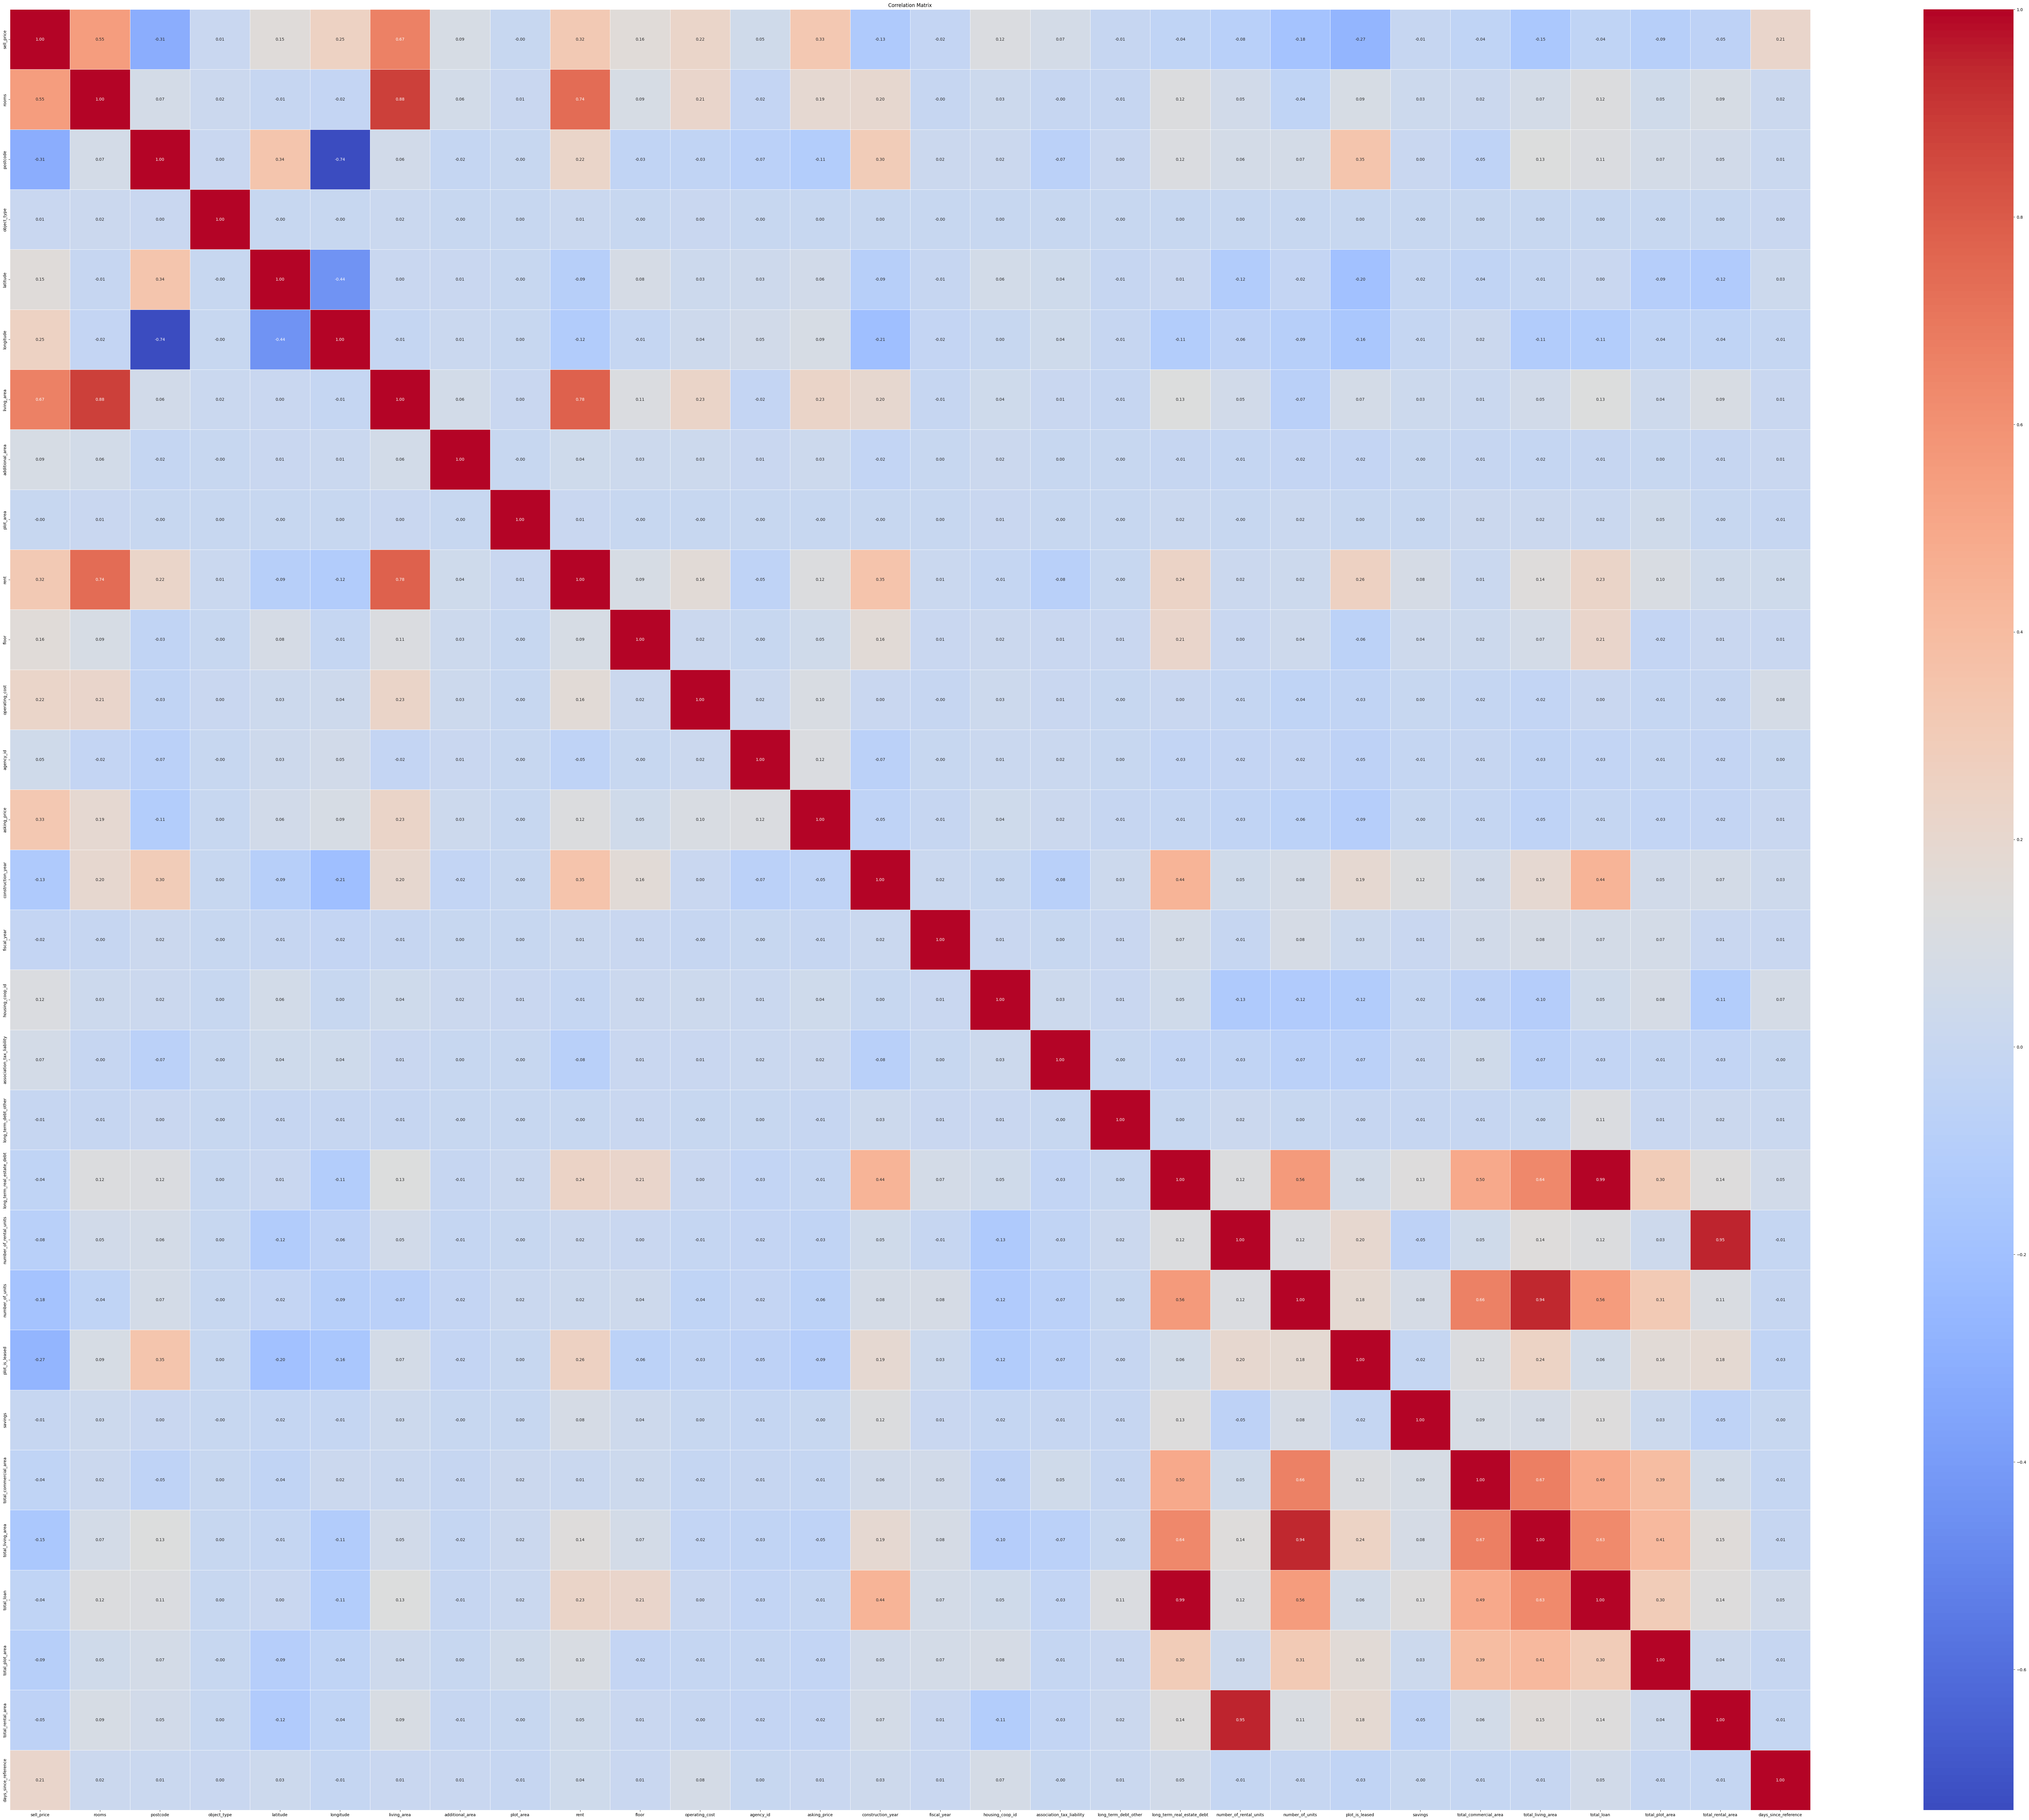

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()


plt.figure(figsize=(100, 80))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)


plt.title('Correlation Matrix')


plt.show()


#scaling

In [ ]:
df

,sell_price,rooms,postcode,object_type,latitude,longitude,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
0,3600000.0,1.0,11349,0,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2019.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,-17.0,662.936964,2028.0,1.0,1422.987395,187.503821,2140
1,3600000.0,1.0,11349,0,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2020.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,216.0,321.000000,2028.0,1.0,1422.987395,187.503821,2140
2,3600000.0,1.0,11349,0,59.348123,18.059586,41.0,0.0,3043.508108,906.0,4.000000,502.561987,198.742035,4.421596e+06,1886.000000,2021.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,160.0,321.000000,2028.0,1.0,1422.987395,187.503821,2140
3,6495000.0,2.0,11349,0,59.348123,18.059586,59.0,0.0,3043.508108,1213.0,2.000000,1667.000000,289.000000,6.495000e+06,1886.000000,2019.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,-17.0,321.000000,2028.0,1.0,1422.987395,187.503821,3542
4,6495000.0,2.0,11349,0,59.348123,18.059586,59.0,0.0,3043.508108,1213.0,2.000000,1667.000000,289.000000,6.495000e+06,1886.000000,2020.0,81598.0,0,0.000000,1.0,0.0,28.0,0.0,216.0,321.000000,2028.0,1.0,1422.987395,187.503821,3542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636755,NaN,6.0,16561,0,59.357359,17.836851,149.0,141.0,3043.508108,5911.0,2.771761,3358.000000,65.000000,7.495000e+06,1958.000000,2021.0,282017.0,0,0.000000,2502835.0,0.0,30.0,1.0,198.0,662.936964,3643.0,2502835.0,16941.000000,187.503821,3900
636756,NaN,1.0,16761,0,59.324006,17.957327,40.0,0.0,3043.508108,1876.0,1.000000,450.000000,34.000000,2.995000e+06,1956.047919,2019.0,269329.0,0,143610.258113,3100000.0,0.0,14.0,1.0,190.0,88.000000,993.0,3100000.0,1422.987395,187.503821,3943
636757,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.000000,12.000000,7.595000e+06,1889.000000,2018.0,56518.0,0,0.000000,4700000.0,0.0,17.0,0.0,51.0,0.000000,1233.0,4700000.0,0.000000,0.000000,3934
636758,NaN,2.0,11454,0,59.335424,18.086856,60.0,0.0,3043.508108,2090.0,2.000000,1600.000000,12.000000,7.595000e+06,1889.000000,2019.0,56518.0,0,0.000000,4900000.0,0.0,17.0,0.0,94.0,0.000000,1233.0,4900000.0,0.000000,0.000000,3934


In [ ]:
na_counts = df.isna().sum()

# Iterate through the Series and print the count of NAs for each column
for column_name, na_count in na_counts.items():
    print(f"'{column_name}': {na_count} ")

'sell_price': 14954 
'rooms': 0 
'postcode': 0 
'object_type': 0 
'latitude': 0 
'longitude': 0 
'living_area': 0 
'additional_area': 0 
'plot_area': 0 
'rent': 0 
'floor': 0 
'operating_cost': 0 
'agency_id': 0 
'asking_price': 0 
'construction_year': 0 
'fiscal_year': 0 
'housing_coop_id': 0 
'association_tax_liability': 0 
'long_term_debt_other': 0 
'long_term_real_estate_debt': 0 
'number_of_rental_units': 0 
'number_of_units': 0 
'plot_is_leased': 0 
'savings': 0 
'total_commercial_area': 0 
'total_living_area': 0 
'total_loan': 0 
'total_plot_area': 0 
'total_rental_area': 0 
'days_since_reference': 0 


In [ ]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = [
'latitude', 'longitude', 'living_area', 'additional_area',
    'plot_area', 'rent', 'floor', 'operating_cost', 'asking_price',
    'construction_year', 'fiscal_year', 'long_term_debt_other',
    'long_term_real_estate_debt', 'number_of_rental_units', 'number_of_units',
    'total_commercial_area', 'total_living_area', 'total_loan',
    'total_plot_area', 'total_rental_area', 'days_since_reference'
]

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,sell_price,rooms,postcode,object_type,latitude,longitude,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
0,3600000.0,1.0,11349,0,0.873441,0.488537,-0.760317,-0.059764,2.673158e-15,-1.776531,5.641767e-01,-4.313203e-16,198.742035,-2.879051e-15,-2.159682e+00,-0.435951,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,-17.0,-2.047477e-16,-0.641892,-0.825537,3.236794e-17,0.000000,-0.034525
1,3600000.0,1.0,11349,0,0.873441,0.488537,-0.760317,-0.059764,2.673158e-15,-1.776531,5.641767e-01,-4.313203e-16,198.742035,-2.879051e-15,-2.159682e+00,0.293844,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,216.0,-3.079108e-01,-0.641892,-0.825537,3.236794e-17,0.000000,-0.034525
2,3600000.0,1.0,11349,0,0.873441,0.488537,-0.760317,-0.059764,2.673158e-15,-1.776531,5.641767e-01,-4.313203e-16,198.742035,-2.879051e-15,-2.159682e+00,1.023638,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,160.0,-3.079108e-01,-0.641892,-0.825537,3.236794e-17,0.000000,-0.034525
3,6495000.0,2.0,11349,0,0.873441,0.488537,-0.035582,-0.059764,2.673158e-15,-1.539364,-3.544990e-01,4.417800e+00,289.000000,2.136544e+00,-2.159682e+00,-0.435951,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,-17.0,-3.079108e-01,-0.641892,-0.825537,3.236794e-17,0.000000,1.254868
4,6495000.0,2.0,11349,0,0.873441,0.488537,-0.035582,-0.059764,2.673158e-15,-1.539364,-3.544990e-01,4.417800e+00,289.000000,2.136544e+00,-2.159682e+00,0.293844,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,216.0,-3.079108e-01,-0.641892,-0.825537,3.236794e-17,0.000000,1.254868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636755,NaN,6.0,16561,0,1.163152,-3.153429,3.588095,36.635835,2.673158e-15,2.089975,-4.079740e-16,1.083334e+01,65.000000,3.166997e+00,6.018557e-02,1.023638,282017.0,0,-2.363094e-02,-0.781510,-0.422284,-0.635537,1.0,198.0,-2.047477e-16,-0.473277,-0.779104,2.209078e+00,0.000000,1.584114
636756,NaN,1.0,16761,0,0.116966,-1.183514,-0.800580,-0.059764,2.673158e-15,-1.027178,-8.138369e-01,-1.994167e-01,34.000000,-1.470039e+00,1.402054e-14,-0.435951,269329.0,0,9.578017e-18,-0.770362,-0.422284,-0.729801,1.0,190.0,-5.177250e-01,-0.749952,-0.768025,3.236794e-17,0.000000,1.623660
636757,NaN,2.0,11454,0,0.475097,0.934425,0.004681,-0.059764,2.673158e-15,-0.861857,-3.544990e-01,4.163607e+00,12.000000,3.270042e+00,-2.067188e+00,-1.165745,56518.0,0,-2.363094e-02,-0.740493,-0.422284,-0.712126,0.0,51.0,-5.969682e-01,-0.724895,-0.738342,-2.025704e-01,-0.402419,1.615383
636758,NaN,2.0,11454,0,0.475097,0.934425,0.004681,-0.059764,2.673158e-15,-0.861857,-3.544990e-01,4.163607e+00,12.000000,3.270042e+00,-2.067188e+00,-0.435951,56518.0,0,-2.363094e-02,-0.736760,-0.422284,-0.712126,0.0,94.0,-5.969682e-01,-0.724895,-0.734631,-2.025704e-01,-0.402419,1.615383


#pca all

In [ ]:
df.reset_index(drop=True, inplace=True)
df

,sell_price,rooms,postcode,object_type,latitude,longitude,living_area,additional_area,plot_area,rent,floor,operating_cost,agency_id,asking_price,construction_year,fiscal_year,housing_coop_id,association_tax_liability,long_term_debt_other,long_term_real_estate_debt,number_of_rental_units,number_of_units,plot_is_leased,savings,total_commercial_area,total_living_area,total_loan,total_plot_area,total_rental_area,days_since_reference
0,3600000.0,1.0,11349,0,0.873441,0.488537,-0.760317,-0.059764,2.673158e-15,-1.776531,5.641767e-01,-4.313203e-16,198.742035,-2.879051e-15,-2.159682e+00,-0.435951,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,-17.0,-2.047477e-16,-0.641892,-0.825537,3.236794e-17,0.000000,-0.034525
1,3600000.0,1.0,11349,0,0.873441,0.488537,-0.760317,-0.059764,2.673158e-15,-1.776531,5.641767e-01,-4.313203e-16,198.742035,-2.879051e-15,-2.159682e+00,0.293844,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,216.0,-3.079108e-01,-0.641892,-0.825537,3.236794e-17,0.000000,-0.034525
2,3600000.0,1.0,11349,0,0.873441,0.488537,-0.760317,-0.059764,2.673158e-15,-1.776531,5.641767e-01,-4.313203e-16,198.742035,-2.879051e-15,-2.159682e+00,1.023638,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,160.0,-3.079108e-01,-0.641892,-0.825537,3.236794e-17,0.000000,-0.034525
3,6495000.0,2.0,11349,0,0.873441,0.488537,-0.035582,-0.059764,2.673158e-15,-1.539364,-3.544990e-01,4.417800e+00,289.000000,2.136544e+00,-2.159682e+00,-0.435951,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,-17.0,-3.079108e-01,-0.641892,-0.825537,3.236794e-17,0.000000,1.254868
4,6495000.0,2.0,11349,0,0.873441,0.488537,-0.035582,-0.059764,2.673158e-15,-1.539364,-3.544990e-01,4.417800e+00,289.000000,2.136544e+00,-2.159682e+00,0.293844,81598.0,0,-2.363094e-02,-0.828233,-0.422284,-0.647320,0.0,216.0,-3.079108e-01,-0.641892,-0.825537,3.236794e-17,0.000000,1.254868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636755,NaN,6.0,16561,0,1.163152,-3.153429,3.588095,36.635835,2.673158e-15,2.089975,-4.079740e-16,1.083334e+01,65.000000,3.166997e+00,6.018557e-02,1.023638,282017.0,0,-2.363094e-02,-0.781510,-0.422284,-0.635537,1.0,198.0,-2.047477e-16,-0.473277,-0.779104,2.209078e+00,0.000000,1.584114
636756,NaN,1.0,16761,0,0.116966,-1.183514,-0.800580,-0.059764,2.673158e-15,-1.027178,-8.138369e-01,-1.994167e-01,34.000000,-1.470039e+00,1.402054e-14,-0.435951,269329.0,0,9.578017e-18,-0.770362,-0.422284,-0.729801,1.0,190.0,-5.177250e-01,-0.749952,-0.768025,3.236794e-17,0.000000,1.623660
636757,NaN,2.0,11454,0,0.475097,0.934425,0.004681,-0.059764,2.673158e-15,-0.861857,-3.544990e-01,4.163607e+00,12.000000,3.270042e+00,-2.067188e+00,-1.165745,56518.0,0,-2.363094e-02,-0.740493,-0.422284,-0.712126,0.0,51.0,-5.969682e-01,-0.724895,-0.738342,-2.025704e-01,-0.402419,1.615383
636758,NaN,2.0,11454,0,0.475097,0.934425,0.004681,-0.059764,2.673158e-15,-0.861857,-3.544990e-01,4.163607e+00,12.000000,3.270042e+00,-2.067188e+00,-0.435951,56518.0,0,-2.363094e-02,-0.736760,-0.422284,-0.712126,0.0,94.0,-5.969682e-01,-0.724895,-0.734631,-2.025704e-01,-0.402419,1.615383


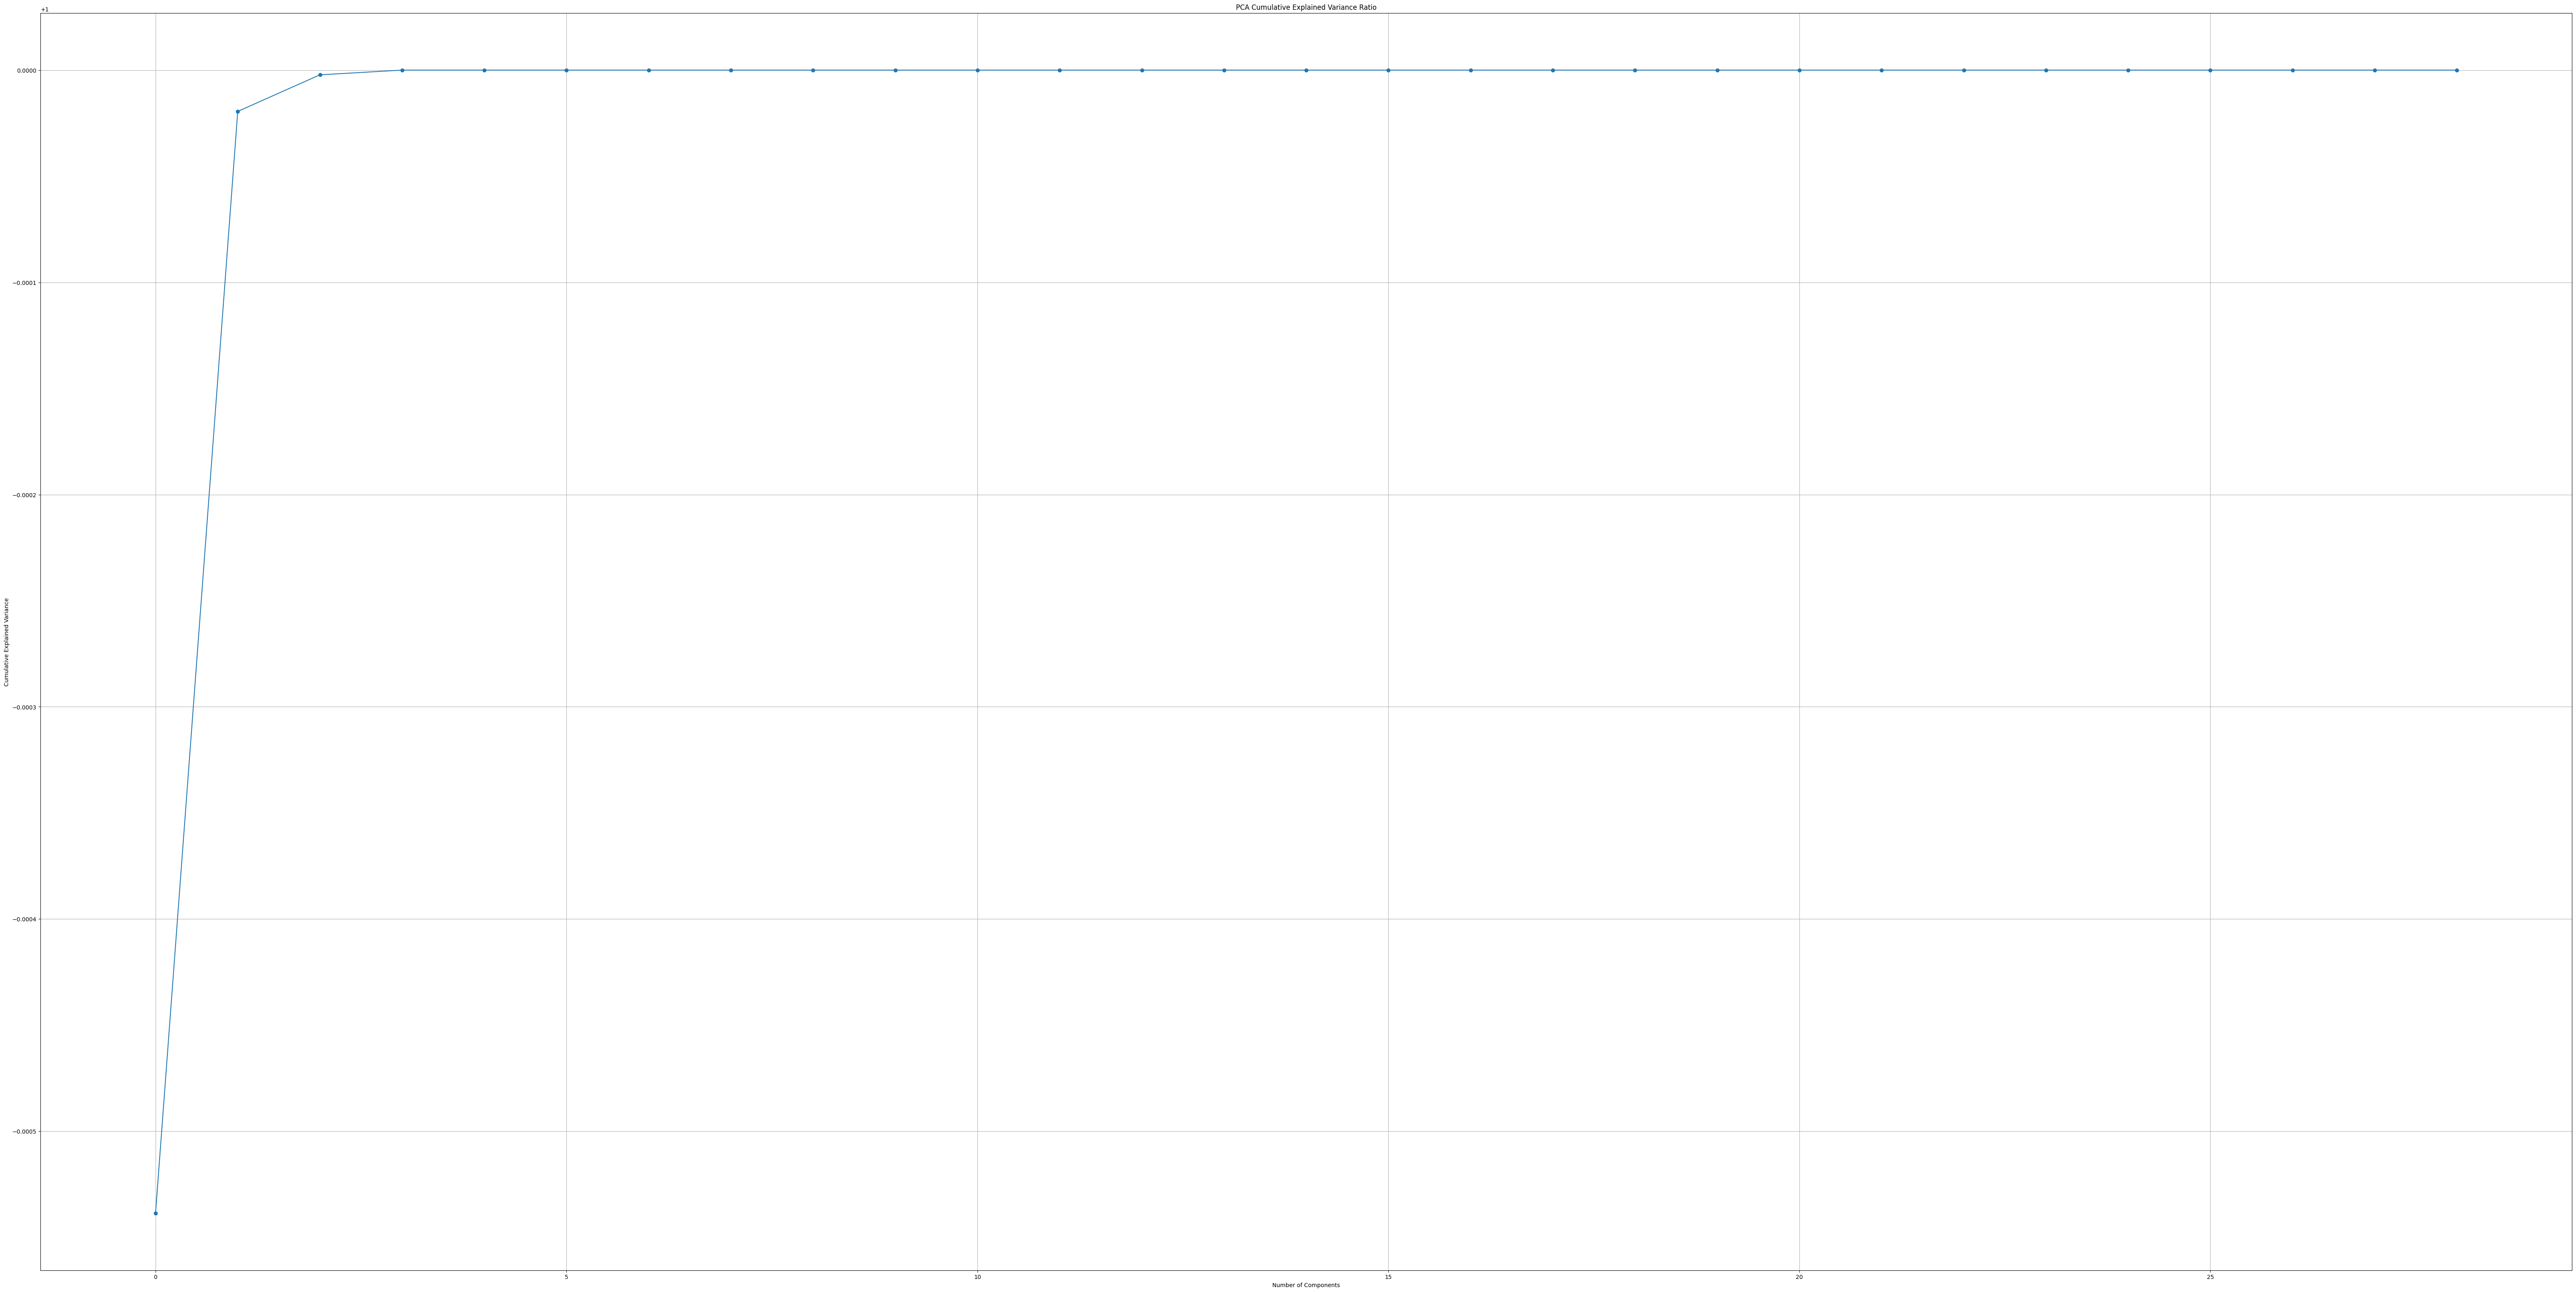

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()

y_cols = df[['sell_price']]

pca_data=df.drop(columns= ['sell_price'])
pca.fit(pca_data)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

plt.figure(figsize=(80, 40))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=3)
pca.fit(pca_data)
principalComponents = pca.transform(pca_data)


pc_list = []
pc_list.extend([f'pc{i}' for i in range(0, 3)])

pca_df = pd.DataFrame(data=principalComponents, columns=pc_list)
pca_df

,pc0,pc1,pc2
0,-13492.732815,-1198.350052,-196.172524
1,-13492.748301,-1198.130126,36.824993
2,-13492.744579,-1198.182971,-19.174402
3,-13492.731271,-1198.764981,-196.566048
4,-13492.746757,-1198.545063,36.431552
...,...,...,...
636755,186928.717776,3918.672486,27.814782
636756,174240.814804,4124.865100,18.905105
636757,-38572.687419,-1080.448572,-129.140150
636758,-38572.690277,-1080.407979,-86.140571


In [ ]:
y_cols

,sell_price
0,3600000.0
1,3600000.0
2,3600000.0
3,6495000.0
4,6495000.0
...,...
636755,NaN
636756,NaN
636757,NaN
636758,NaN


In [ ]:
pca_df = pd.concat([y_cols,pca_df], axis=1)

pca_df

,sell_price,pc0,pc1,pc2
0,3600000.0,-13492.732815,-1198.350052,-196.172524
1,3600000.0,-13492.748301,-1198.130126,36.824993
2,3600000.0,-13492.744579,-1198.182971,-19.174402
3,6495000.0,-13492.731271,-1198.764981,-196.566048
4,6495000.0,-13492.746757,-1198.545063,36.431552
...,...,...,...,...
636755,NaN,186928.717776,3918.672486,27.814782
636756,NaN,174240.814804,4124.865100,18.905105
636757,NaN,-38572.687419,-1080.448572,-129.140150
636758,NaN,-38572.690277,-1080.407979,-86.140571


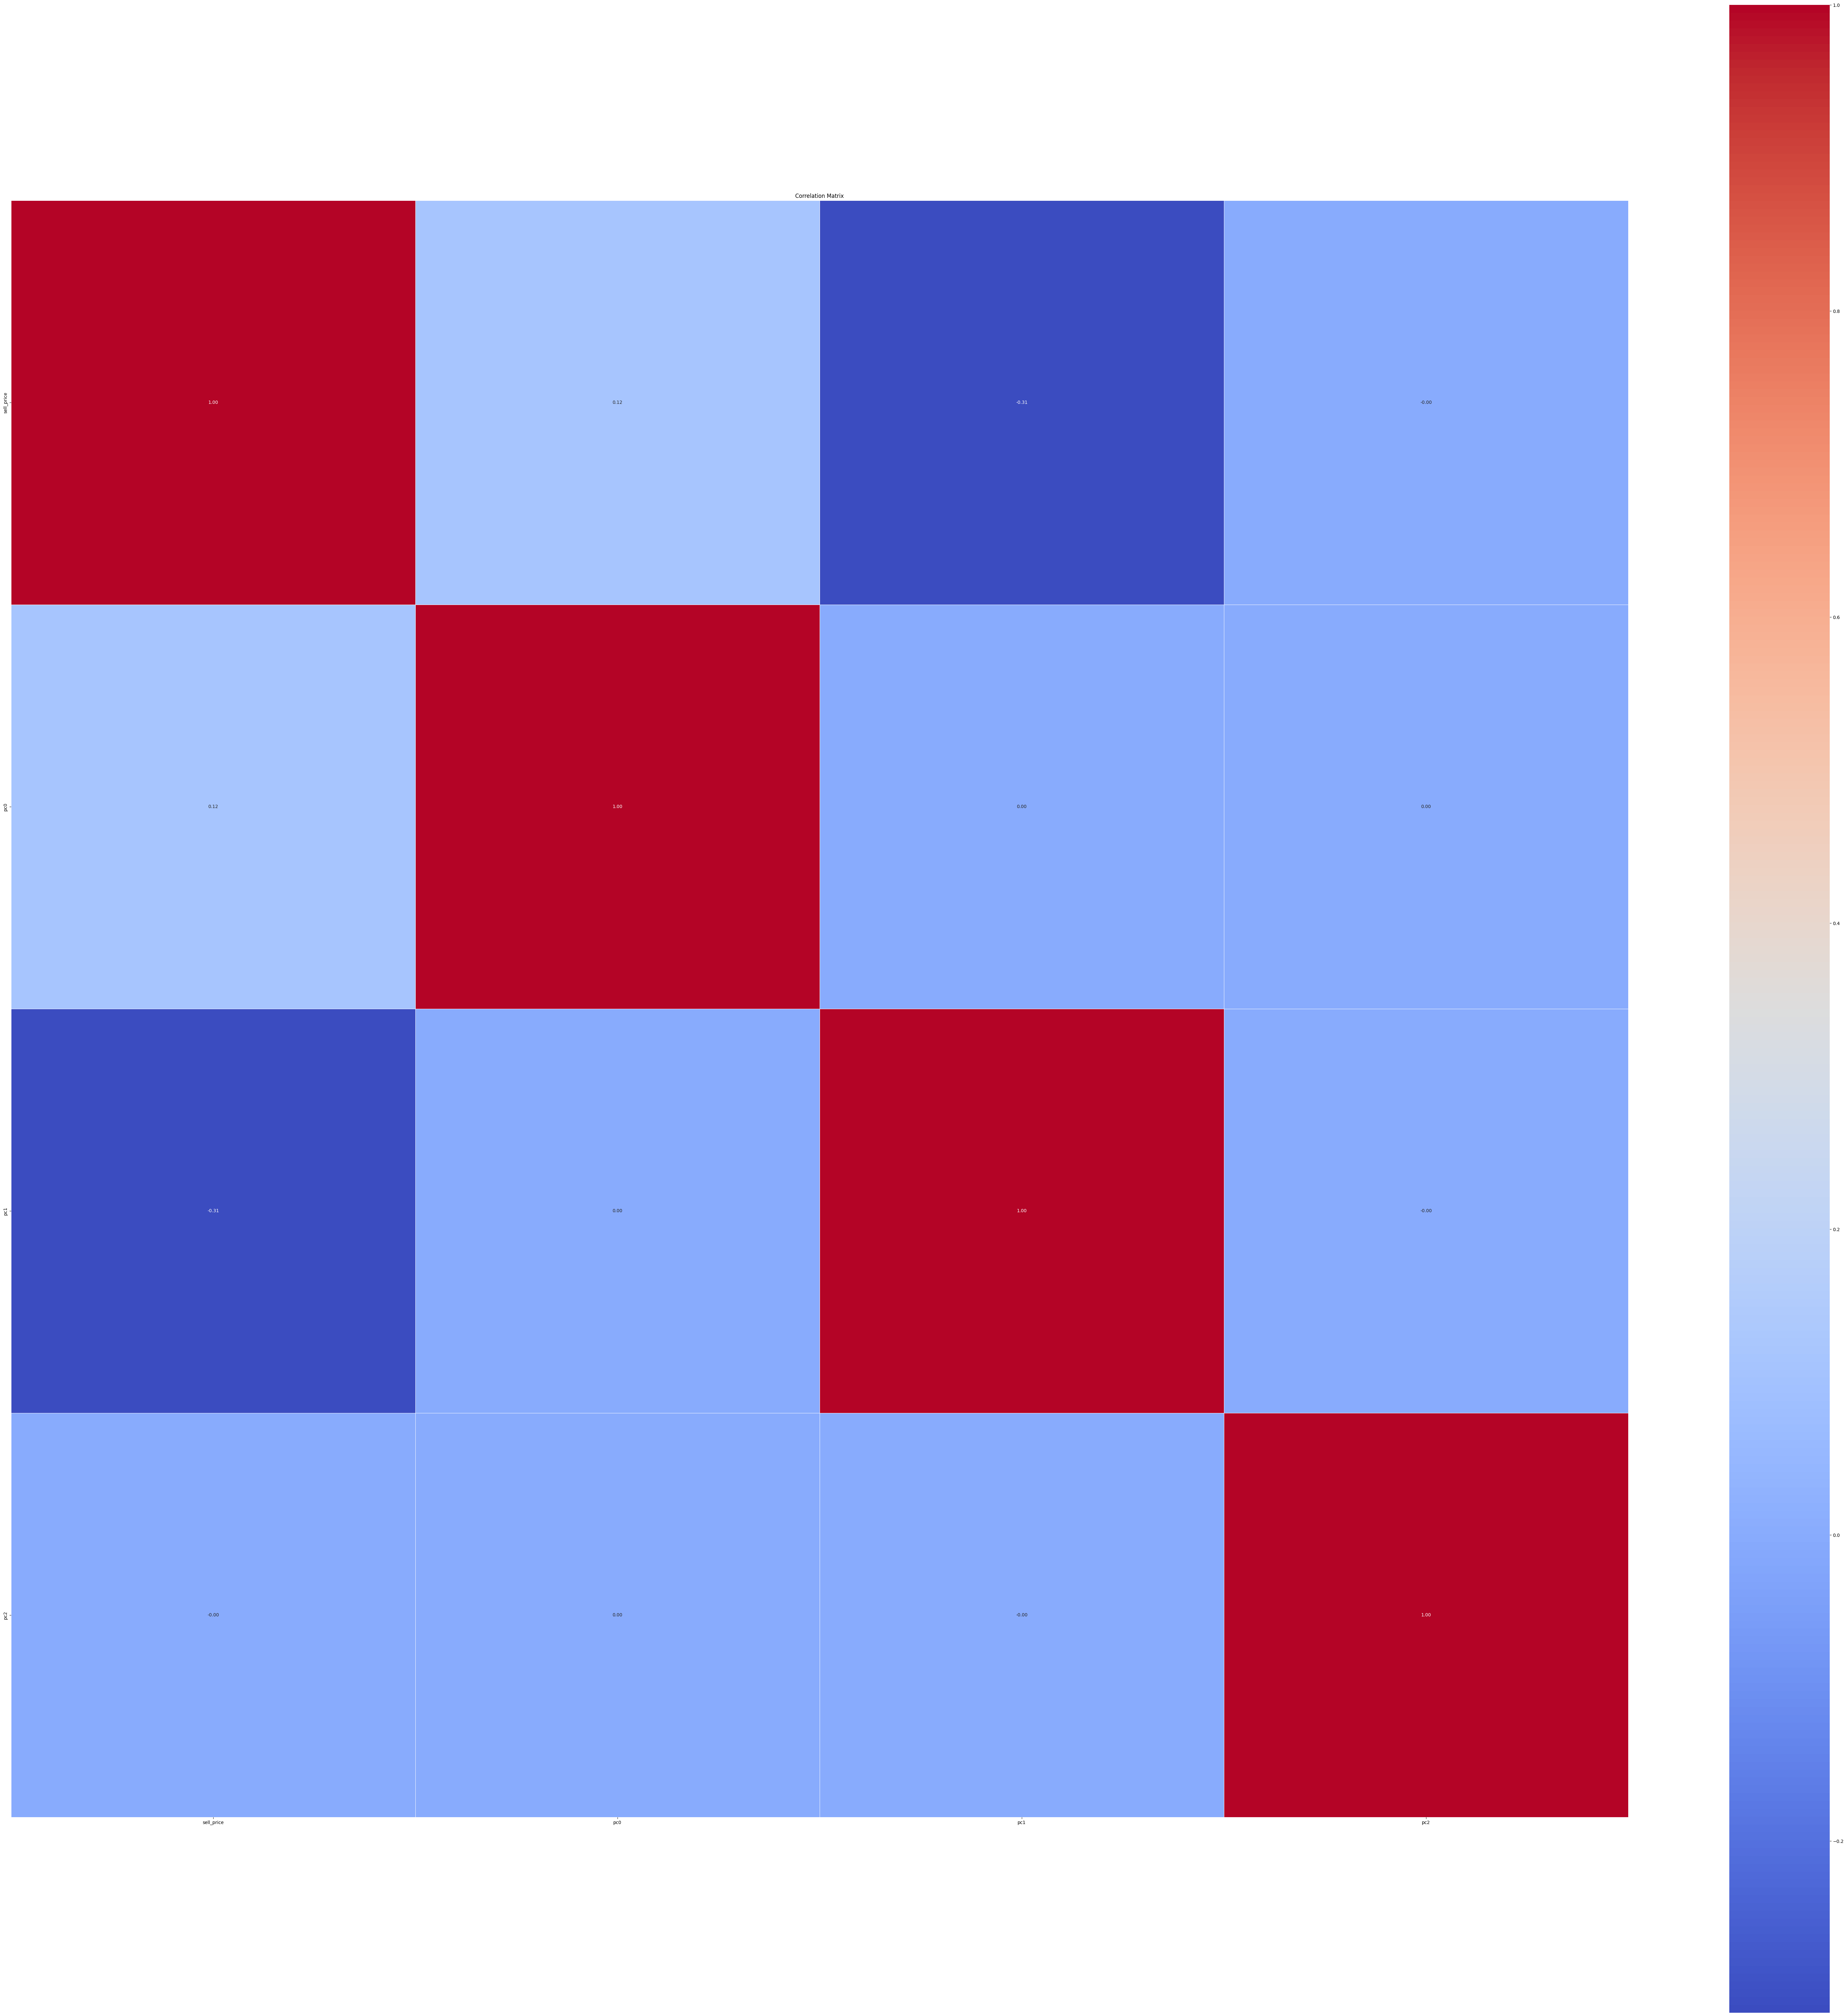

In [ ]:
correlation_matrix = pca_df.corr()


plt.figure(figsize=(80, 80))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)


plt.title('Correlation Matrix')


plt.show()

#splitting data

In [ ]:
df_train = pca_df[pca_df['sell_price'].notna()]
df_train

,sell_price,pc0,pc1,pc2
0,3600000.0,-13492.732815,-1198.350052,-196.172524
1,3600000.0,-13492.748301,-1198.130126,36.824993
2,3600000.0,-13492.744579,-1198.182971,-19.174402
3,6495000.0,-13492.731271,-1198.764981,-196.566048
4,6495000.0,-13492.746757,-1198.545063,36.431552
...,...,...,...,...
636726,3615000.0,-12786.163759,4194.165112,-6.105686
636727,3700000.0,-12786.168489,4195.439340,-4.896786
636728,3200000.0,-12786.168489,4195.439310,-4.896628
636729,4550000.0,-12786.168488,4195.439370,-4.896593


In [ ]:
df_predict = pca_df[pca_df['sell_price'].isna()]
df_predict

,sell_price,pc0,pc1,pc2
614564,NaN,-13492.727695,-1191.825226,-196.628651
614565,NaN,-13492.743181,-1191.605309,36.368949
614566,NaN,-13492.739459,-1191.658153,-19.630445
614567,NaN,-14809.235988,4010.879077,-105.545220
614568,NaN,-14809.234790,4010.862103,-123.544860
...,...,...,...,...
636755,NaN,186928.717776,3918.672486,27.814782
636756,NaN,174240.814804,4124.865100,18.905105
636757,NaN,-38572.687419,-1080.448572,-129.140150
636758,NaN,-38572.690277,-1080.407979,-86.140571


In [ ]:
from sklearn.model_selection import train_test_split


from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split


random_seed = 8
y = df_train['sell_price']
X = df_train.drop(columns=['sell_price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, stratify=y_train, random_state=random_seed)


##model

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np
from xgboost import XGBRFClassifier


# need to import all the models that we are going to test
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression, Ridge, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

models = [
    ('Logistic Regression', LogisticRegression(max_iter=100000)),
    ('Ridge Regressor', Ridge()),
    ('SGD Regressor', SGDRegressor(max_iter=100000)),
    ('Linear SVR', SVR(kernel='linear')),
    ('Polynomial SVR (degree 2)', SVR(kernel='poly', degree=2)),
    ('Polynomial SVR (degree 3)', SVR(kernel='poly', degree=3)),
    ('Polynomial SVR (degree 4)', SVR(kernel='poly', degree=4)),
    ('RBF SVR', SVR(kernel='rbf')),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Extra Tree Regressor', ExtraTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('AdaBoost Regressor', AdaBoostRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('Extra Trees Regressor', ExtraTreesRegressor()),
    ('Bagging Regressor', BaggingRegressor()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis())
]


# maybe try this ('MLP Neural Network', MLPClassifier(max_iter=100000)), a couple of neural networks were used but none were really used that exstensivebly


# In a github repo for a similar challenge from a couple of years back stacking was used and yielded high performance, we'll try that as well


# Define the number of folds for cross-validation
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=8)

# Initialize an empty list to store results
results = []



# Iterate through each model
for name, model in models:
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

    # Calculate the mean accuracy and standard deviation
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)

    # Append the results
    results.append((name, mean_accuracy, std_accuracy))

    # Print the performance of the current model
    print(f"{name}: Mean Accuracy: {mean_accuracy:.4f}, Standard Deviation: {std_accuracy:.4f}")

# Find the model with the best mean accuracy
best_model = max(results, key=lambda item: item[1])

# Report the best models
sorted_results = sorted(results, key=lambda item: item[1], reverse=True)
print("Top 10 Best Models:")
for rank, (name, mean_accuracy, std_accuracy) in enumerate(sorted_results[:10]):
    print(f"{rank}. {name}: Mean Accuracy: {mean_accuracy:.4f}, Standard Deviation: {std_accuracy:.4f}")

print(f"Best Model: {best_model[0]} with a Mean Accuracy of {best_model[1]:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
def print_best_trials(study, trial):
    print("Best trials so far:")
    for t in study.best_trials:
        print(f"Trial number: {t.number}")
        print(f"  Values: {t.values}")
        print("  Params: ")
        for key, value in t.params.items():
            print(f"    - {key}: {value}")
        print("\n")

In [ ]:
random_seed = 8
y = df['y_encoded']
X = df.drop(columns=['y', 'y_encoded'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, stratify=y_train, random_state=random_seed)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=random_seed)
# X_val_1, X_temp, y_val_1, y_temp = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=random_seed)
# X_val_2, X_test, y_val_2, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=random_seed)

In [ ]:
!pip install optuna
import pandas as pd
import optuna
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

results1 = []


def objective(trial):

    # RANDOM FOREST
        n_estimators_RF = trial.suggest_int('n_estimators_RF', 50,1200)
        max_depth_RF = trial.suggest_int('max_depth_RF', 3, 30)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

        # strat_k_fold =trial.suggest_categorical('strat_k_fold', [7,StratifiedKFold(n_splits=7)])

        rf = RandomForestClassifier(n_estimators=n_estimators_RF, max_depth=max_depth_RF,
                                    min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                    max_features=max_features, random_state=random_seed)

        rf.fit(X_train, y_train)
        # y_pred_best = rf.predict(X_train)
        # accuracy_best = accuracy_score(y_train, y_pred_best)


    # XGBRF
        n_estimators_XGBRF = trial.suggest_int('n_estimators_XGBRF', 50,1200)
        max_depth_XGBRF = trial.suggest_int('max_depth_XGBRF', 1, 30)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
        subsample = trial.suggest_float('subsample', 0.1, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)

        xgbrf = XGBRFClassifier(n_estimators=n_estimators_XGBRF, max_depth=max_depth_XGBRF,
                            learning_rate=learning_rate, subsample=subsample,
                            colsample_bytree=colsample_bytree, random_state=random_seed)

        xgbrf.fit(X_train, y_train)
        # y_xgbrf_pred = xgbrf.predict(X_train)
        # accuracy_xgbrf = accuracy_score(y_train, y_xgbrf_pred)

  # SVM
        C = trial.suggest_float('C', 1e-3, 1e3, log=True)
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

        svm = SVC(C=C, kernel=kernel, gamma=gamma, random_state=random_seed)

        svm.fit(X_train, y_train)

  #

  # Ensemble
        stacking_clf = StackingClassifier(
        estimators=[('rf', rf), ('xgbrf', xgbrf), ('svm', svm)],
        final_estimator=LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0, random_state=random_seed),
)
        stacking_clf.fit(X_train, y_train)
        y_stacking_clf_pred = stacking_clf.predict(X_val)
        accuracy_stacking_clf = accuracy_score(y_val, y_stacking_clf_pred)



   #Cross validation training accuracy
        strat_k_fold=StratifiedKFold(n_splits=7, shuffle=True, random_state=random_seed)
        crossAcc = cross_val_score(stacking_clf, X_val, y_val, cv=strat_k_fold, n_jobs=-1).mean()


        return accuracy_stacking_clf, crossAcc


sampler = optuna.samplers.TPESampler(seed=random_seed)
study = optuna.create_study(directions=['maximize', 'maximize'], sampler=sampler)
study.optimize(objective, n_trials=1000, callbacks=[print_best_trials])

for trial in study.best_trials:

            best_params = study.best_trial.params


            rf_best = RandomForestClassifier(
                n_estimators=best_params['n_estimators_RF'],
                max_depth=best_params['max_depth_RF'],
                min_samples_split=best_params['min_samples_split'],
                min_samples_leaf=best_params['min_samples_leaf'],
                max_features=best_params['max_features'],
                random_state=random_seed
            )


            xgbrf_best = XGBRFClassifier(
                n_estimators=best_params['n_estimators_XGBRF'],
                max_depth=best_params['max_depth_XGBRF'],
                learning_rate=best_params['learning_rate'],
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree'],
                random_state=random_seed
            )

            svm_best = SVC(
                C=best_params['C'],
                kernel=best_params['kernel'],
                gamma=best_params['gamma'],
                random_state=random_seed
            )

            stacking_clf_best = StackingClassifier(
                estimators=[('rf', rf_best), ('xgbrf', xgbrf_best), ('svm', svm_best)],
                final_estimator=LogisticRegression(max_iter=500, solver='lbfgs', C=1.0, random_state=random_seed),

            )

            stacking_clf_best.fit(X_train, y_train)



            # Additional metrics calculations
            cv_splitter = KFold(n_splits=7, shuffle=True, random_state=random_seed)


            y_pred_best = stacking_clf_best.predict(X_test)
            accuracy_best = accuracy_score(y_test, y_pred_best)
            precision_best = precision_score(y_test, y_pred_best, average='weighted')
            recall_best = recall_score(y_test, y_pred_best, average='weighted')
            f1_best = f1_score(y_test, y_pred_best, average='weighted')
            cross_val_best_stacking_clf_best_train = np.mean(cross_val_score(stacking_clf_best, X_train, y_train, cv=cv_splitter))
            cross_val_best_stacking_clf_best_val = np.mean(cross_val_score(stacking_clf_best, X_val, y_val, cv=cv_splitter))
            cross_val_best_stacking_clf_best_test = np.mean(cross_val_score(stacking_clf_best, X_test, y_test, cv=cv_splitter))
            cross_val_best_stacking_clf_best_all = np.mean(cross_val_score(stacking_clf_best, X, y, cv=cv_splitter))
            y_pred_probs_best = stacking_clf_best.predict_proba(X_val)[:, 1]


            # Bootstrap scores
            stacking_clf_best_bootstrap_scores = []
            n_bootstrap = 100
            for seed in range(8, 8 + n_bootstrap):
                np.random.seed(seed)
                X_test_sample, y_test_sample = resample(X_test, y_test)
                y_pred_sample = stacking_clf_best.predict(X_test_sample)
                score = accuracy_score(y_test_sample, y_pred_sample)
                stacking_clf_best_bootstrap_scores.append(score)
            stacking_clf_best_average_score = np.mean(stacking_clf_best_bootstrap_scores)
            #rf_variance_score = np.var(rf_bootstrap_scores)

            #placebo
            # np.random.seed(random_seed)
            # X_train_random = np.random.random(size=X_train.shape)
            # stacking_clf_best_random = RandomForestClassifier(**trial.params)
            # stacking_clf_best_random.fit(X_train_random, y_train)
            # y_pred_random = stacking_clf_best_random.predict(X_test)
            # accuracy_random = accuracy_score(y_test, y_pred_random)

            # Append results to the list
            results1.append({
                'Best Hyperparameters': trial.params,
                'Accuracy': accuracy_best,
                'Cross Validation test Accuracy':cross_val_best_stacking_clf_best_test,
                'Bootstrap Average Score': stacking_clf_best_average_score,
                # 'Placebo Accuracy': accuracy_random,
                'Cross Validation train Accuracy': cross_val_best_stacking_clf_best_train,
                'cross_val_best_stacking_clf_best_val':cross_val_best_stacking_clf_best_val,
                'Precision': precision_best,
                'Recall': recall_best,
                'F1 Score': f1_best,
                #'Bootstrap Variance Score': rf_variance_score
                })
# Convert results list to DataFrame
results_df1 = pd.DataFrame(results1)

[I 2024-03-14 18:21:52,592] Trial 199 finished with values: [0.6944444444444444, 0.6931972789115647] and parameters: {'n_estimators_RF': 1003, 'max_depth_RF': 6, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'n_estimators_XGBRF': 1158, 'max_depth_XGBRF': 5, 'learning_rate': 0.07172322620806364, 'subsample': 0.9859641785194472, 'colsample_bytree': 0.4018867551970564, 'C': 0.07526675312629494, 'kernel': 'rbf', 'gamma': 'scale'}.

Best trials so far:
Trial number: 134
  Values: [0.7152777777777778, 0.7210884353741497]
  Params:
    - n_estimators_RF: 1157
    - max_depth_RF: 29
    - min_samples_split: 6
    - min_samples_leaf: 1
    - max_features: log2
    - n_estimators_XGBRF: 325
    - max_depth_XGBRF: 29
    - learning_rate: 0.04065766349601901
    - subsample: 0.9200677154610419
    - colsample_bytree: 0.6022260143936815
    - C: 0.053298186565574106
    - kernel: rbf
    - gamma: scale


Trial number: 196
  Values: [0.7361111111111112, 0.7074829931972789]
  Params:
    - n_estimators_RF: 1052
    - max_depth_RF: 8
    - min_samples_split: 6
    - min_samples_leaf: 1
    - max_features: log2
    - n_estimators_XGBRF: 1164
    - max_depth_XGBRF: 4
    - learning_rate: 0.04523449442955081
    - subsample: 0.9299582843222897
    - colsample_bytree: 0.4913517980578387
    - C: 0.05590990446989274
    - kernel: rbf
    - gamma: scale



In [ ]:
results_df1

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = results_df1[['Accuracy', 'Cross Validation test Accuracy', 'Bootstrap Average Score']]
scaler = MinMaxScaler()
normalized_columns = scaler.fit_transform(columns_to_normalize)
normalized_df = pd.DataFrame(normalized_columns, columns=['Accuracy_normalized', 'Bests Validation test Accuracy_normalized', 'Bootstrap Average Score_normalized'])
results_df1['sum_normalized'] = normalized_df.sum(axis=1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

results_df1


In [ ]:
sorted_df = results_df1.sort_values(by='sum_normalized', ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

sorted_df

4{'n_estimators': 782, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto'}	0.729167	0.749660	0.722361	0.194444	0.656437	0.722239	0.729167	0.721961	3.000000

1	{'n_estimators': 827, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}	0.722222	0.742857	0.716181	0.229167	0.650309	0.717274	0.722222	0.718025	2.422854

0	{'n_estimators': 92, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}	0.708333	0.701701	0.702778	0.256944	0.664134	0.700155	0.708333	0.697973	0.895272

3	{'n_estimators': 69, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto'}	0.708333	0.680952	0.702639	0.319444	0.641125	0.699520	0.708333	0.697771	0.639762

2	{'n_estimators': 69, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}	0.701389	0.666667	0.697153	0.333333	0.648773	0.690944	0.701389	0.689051	0.000000

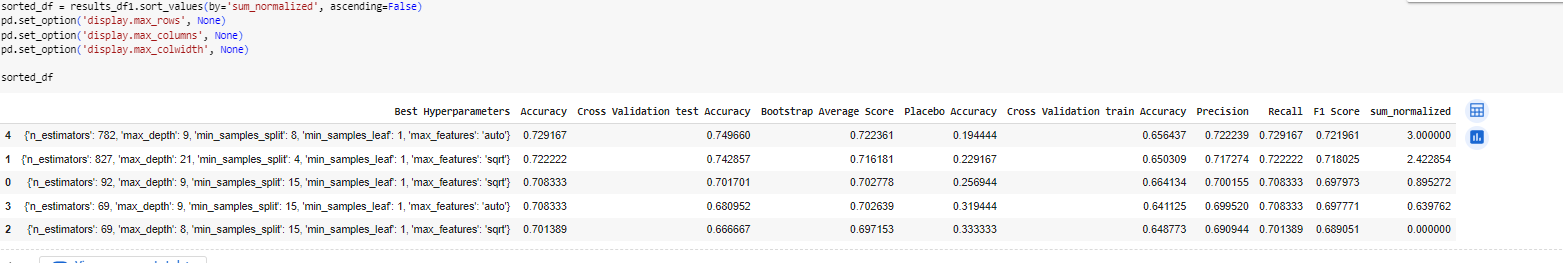